# 통합 식품영양성분DB 정리
### - [클리닝](#1.-클리닝)
### - [타입 변경(object -> float)](#2.-타입-변경)
### - [데이터 단위 통일(영양소 g으로 통일)](#3.-영양소-별-데이터-단위-통일)
### - [각 식품의 영양소 최대 값 행 추가](#4.-)

In [4]:
!pip install openpyxl

You should consider upgrading via the 'C:\Users\JCdata\miniconda3\envs\ydp01\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
food_nutrients = pd.read_excel('통합 식품영양성분DB_20211106.xlsx', skiprows=[0,1,2], engine='openpyxl')
food_nutrients.head()

,NO,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,...,냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),폐기율(%),가식부(%),산가용성물질(%),카페인(㎎),성분표출처,발행기관
0,1,D000006-94-AVG,D000006,음식,품목대표,꿩불고기,2019,충주,평균,구이류,...,-,-,-,5.8,-,-,-,-,식약처('16) 제4권,식품의약품안전처
1,2,D000007-ZZ-AVG,D000007,음식,품목대표,닭갈비,2019,전국(대표),평균,구이류,...,-,-,-,7,-,-,-,-,식약처('16) 제4권,식품의약품안전처
2,3,D000008-66-AVG,D000008,음식,품목대표,닭갈비,2019,춘천,평균,구이류,...,-,-,-,4.5,-,-,-,-,식약처('16) 제4권,식품의약품안전처
3,4,D000009-ZZ-AVG,D000009,음식,품목대표,닭꼬치,2019,전국(대표),평균,구이류,...,-,-,-,1.2176954799497,-,-,-,-,식약처('12) 제1권,식품의약품안전처
4,5,D000010-ZZ-AVG,D000010,음식,품목대표,더덕구이,2019,전국(대표),평균,구이류,...,-,-,-,2.5,-,-,-,-,식약처('17) 제5권,식품의약품안전처


In [7]:
pd.options.display.max_columns = 241
pd.set_option('display.max.colwidth', 50)

food_nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58597 entries, 0 to 58596
Columns: 241 entries, NO to 발행기관
dtypes: float64(1), int64(2), object(238)
memory usage: 107.7+ MB


## 1. 클리닝 

#### 필요없는 colum 제거 및 float로 변환하기 위해 데이터 정제

In [8]:
food_nutrients = food_nutrients.drop(['SAMPLE_ID', '식품코드', '연도', '지역 / 제조사',\
                                      '채취시기', '에너지(kj)', '폐기율(%)', '성분표출처', '발행기관'], axis = 1)

In [9]:
food_nutrients.head()

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),수분(%),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),당알콜(g),에리스리톨(g),총 식이섬유(g),총 식이섬유(mg),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),철(㎍),마그네슘(㎎),인(㎎),칼륨(g),칼륨(㎎),나트륨(㎎),아연(㎎),구리(㎎),구리(㎍),망간(㎎),망간(㎍),셀레늄(㎍),몰리브덴(㎍),요오드(㎍),염소(㎎),비타민 A(㎍),비타민 A(㎍ RE),레티놀(㎍),베타카로틴(㎍),레티놀A효능,비타민 D(D2+D3)(㎍),비타민 D2(㎍),비타민 D3(㎍),비타민 D1(㎍),비타민 E(㎎),비타민 E(㎎ α-TE),알파 토코페롤(㎎),베타 토코페롤(㎎),감마 토코페롤(㎎),델타 토코페롤(㎎),알파 토코트리에놀(㎎),베타 토코트리에놀(㎎),감마 토코트리에놀(㎎),델타 토코트리에놀(㎎),토코페롤(㎎),토코트리에놀(㎎),비타민 K(㎎),비타민 K(㎍),비타민 K1(㎍),비타민 K2(㎍),비타민 B1(㎎),비타민 B1(㎍),비타민 B2(㎎),비타민 B2(㎍),나이아신(㎎),나이아신(㎎ NE),나이아신(NE)(㎎),나이아신(NE)(㎎ NE),니코틴산 (㎎),니코틴아마이드(㎎),판토텐산(㎎),판토텐산(㎍),비타민 B6(㎎),비타민 B6(㎍),피리독신(㎎),비오틴(㎍),엽산(DFE)(㎍),엽산 - 천연 엽산(㎍),엽산 - 합성 엽산(㎍),비타민 B12(㎎),비타민 B12(㎍),비타민 C(g),비타민 C(㎎),콜린(g),콜린(㎎),총 아미노산(g),총 아미노산(㎎),필수 아미노산(㎎),이소류신(㎎),류신(㎎),라이신(㎎),메티오닌(㎎),페닐알라닌(㎎),트레오닌(㎎),트립토판(㎎),발린(㎎),히스티딘(㎎),아르기닌(㎎),비필수 아미노산(㎎),티로신(㎎),시스테인(㎎),알라닌(㎎),아스파르트산(㎎),글루탐산(㎎),글리신(㎎),프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인 (㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),콜레스테롤(g),콜레스테롤(㎎),총 지방산(g),총 필수 지방산(g),총 포화 지방산(g),총 포화 지방산(%),부티르산(4:0)(g),부티르산(4:0)(㎎),카프로산(6:0)(g),카프로산(6:0)(㎎),카프릴산(8:0)(g),카프릴산(8:0)(㎎),카프르산(10:0)(g),카프르산(10:0)(㎎),라우르산(12:0)(g),라우르산(12:0)(㎎),라우르산(12:0)(%),트라이데칸산(13:0)(㎎),미리스트산(14:0)(g),미리스트산(14:0)(㎎),미리스트산(14:0)(%),펜타데칸산(15:0)(㎎),팔미트산(16:0)(g),팔미트산(16:0)(㎎),팔미트산(16:0)(%),헵타데칸산(17:0)(㎎),스테아르산(18:0)(g),스테아르산(18:0)(㎎),스테아르산(18:0)(%),아라키드산(20:0)(g),아라키드산(20:0)(㎎),아라키드산(20:0)(%),헨에이코산산(21:0)(㎎),베헨산(22:0)(㎎),트리코산산(23:0)(㎎),리그노세르산(24:0)(㎎),총 단일 불포화지방산(g),총 단일 불포화지방산(%),미리스톨레산(14:1)(g),미리스톨레산(14:1)(㎎),미리스톨레산(14:1)(%),팔미톨레산(16:1)(g),팔미톨레산(16:1)(㎎),팔미톨레산(16:1)(%),헵타데센산(17:1)(㎎),올레산(18:1(n-9))(g),올레산(18:1(n-9))(㎎),올레산(18:1(n-9))(%),박센산(18:1(n-7))(g),박센산(18:1(n-7))(㎎),가돌레산(20:1)(g),가돌레산(20:1)(㎎),가돌레산(20:1)(%),에루크산(22:1)(㎎),에루크산(22:1)(%),네르본산(24:1)(㎎),총 다중 불포화지방산(g),총 다중 불포화지방산(%),리놀레산(18:2(n-6)c)(g),리놀레산(18:2(n-6)c)(㎎),리놀레산(18:2(n-6)c)(%),알파 리놀렌산(18:3(n-3))(g),알파 리놀렌산(18:3(n-3))(㎎),리놀렌산(18:3(n-3)(%),감마 리놀렌산(18:3(n-6))(g),감마 리놀렌산(18:3(n-6))(㎎),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사디에노산(20:2(n-6))(㎎),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),에이코사트리에노산(20:3(n-6))(㎎),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(㎎),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(㎎),도코사펜타에노산(22:5(n-3))(%),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(㎎),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산 (18:2t)(g),트랜스 리놀레산 (18:2t)(㎎),트랜스 리놀렌산(18:3t)(g),트랜스 리놀렌산(18:3t)(㎎),트랜스 리놀렌산(18:3t)(%),냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),가식부(%),산가용성물질(%),카페인(㎎)
0,1,음식,품목대표,꿩불고기,구이류,육류구이,500.0,g,-,-,368.8,412.6,-,33.5,8.5,-,39.7,16.9,7.2,2.8,2.8,0.7,3.5,-,-,-,9.8,-,-,-,-,-,-,105.61,-,4,85.39,458.05,-,1243.12,1264.31,3.99,0.32,-,0.68,-,47.55,-,-,-,-,-,0,1424.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,8.73,0.06,-,-,-,-,0,-,0.33,-,3.61,-,-,-,-,-,-,-,-,-,-,-,63.13,-,-,-,0,-,2.99,-,-,-,-,-,1284.37582123574,2328.59892766839,2484.75047814224,645.190070073169,1274.92730261488,1410.84127771718,-,1367.68831341948,848.539312406619,2205.5847774439,-,919.805669181432,276.498720836072,1642.38119022329,2781.77304833044,4784.60634708081,1419.92479570739,1092.29548260871,1264.95795056827,-,-,-,-,-,-,-,106.18,-,-,1.9,-,0,-,0,-,0,-,0,-,0.00711483471961893,-,-,-,0.0317835536096363,-,-,-,1.28384114493856,-,-,-,0.527395267901326,-,-,0.0290123491481805,-,-,-,-,-,-,-,-,0,-,-,0.0813516573054785,-,-,-,2.30772104748742,-,-,0.113462530850897,-,0.0279762322988018,-,-,-,-,-,-,-,3.23601791813763,-,-,0.656722581376586,-,-,0.018708284652282,-,-,0.00664887007716417,-,-,0,-,0.142840481460645,-,-,-,0,-,-,-,0,-,-,0.0234269823295255,-,-,-,-,-,0.1,0.018116327971628,-,0.0534160839712029,-,0,-,-,-,-,-,5.8,-,-,-
1,2,음식,품목대표,닭갈비,구이류,육류구이,400.0,g,-,-,595.61,276.4,-,45.9,25.8,-,44.9,21.2,

In [10]:
food_nutrients_copy = food_nutrients.copy()
food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'] = food_nutrients.loc[: ,'단백질(g)':'카페인(㎎)'].replace(['-', 'tr', 'Tr'], 0)

In [11]:
food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'] = \
        food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'].replace(re.compile(r'미만'), 0)
food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'] = \
        food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'].replace(re.compile(r'이하'), 0)
food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'] = \
        food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'].replace(re.compile(r'<'), 0)

food_nutrients_copy.head()

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),수분(%),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),당알콜(g),에리스리톨(g),총 식이섬유(g),총 식이섬유(mg),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),철(㎍),마그네슘(㎎),인(㎎),칼륨(g),칼륨(㎎),나트륨(㎎),아연(㎎),구리(㎎),구리(㎍),망간(㎎),망간(㎍),셀레늄(㎍),몰리브덴(㎍),요오드(㎍),염소(㎎),비타민 A(㎍),비타민 A(㎍ RE),레티놀(㎍),베타카로틴(㎍),레티놀A효능,비타민 D(D2+D3)(㎍),비타민 D2(㎍),비타민 D3(㎍),비타민 D1(㎍),비타민 E(㎎),비타민 E(㎎ α-TE),알파 토코페롤(㎎),베타 토코페롤(㎎),감마 토코페롤(㎎),델타 토코페롤(㎎),알파 토코트리에놀(㎎),베타 토코트리에놀(㎎),감마 토코트리에놀(㎎),델타 토코트리에놀(㎎),토코페롤(㎎),토코트리에놀(㎎),비타민 K(㎎),비타민 K(㎍),비타민 K1(㎍),비타민 K2(㎍),비타민 B1(㎎),비타민 B1(㎍),비타민 B2(㎎),비타민 B2(㎍),나이아신(㎎),나이아신(㎎ NE),나이아신(NE)(㎎),나이아신(NE)(㎎ NE),니코틴산 (㎎),니코틴아마이드(㎎),판토텐산(㎎),판토텐산(㎍),비타민 B6(㎎),비타민 B6(㎍),피리독신(㎎),비오틴(㎍),엽산(DFE)(㎍),엽산 - 천연 엽산(㎍),엽산 - 합성 엽산(㎍),비타민 B12(㎎),비타민 B12(㎍),비타민 C(g),비타민 C(㎎),콜린(g),콜린(㎎),총 아미노산(g),총 아미노산(㎎),필수 아미노산(㎎),이소류신(㎎),류신(㎎),라이신(㎎),메티오닌(㎎),페닐알라닌(㎎),트레오닌(㎎),트립토판(㎎),발린(㎎),히스티딘(㎎),아르기닌(㎎),비필수 아미노산(㎎),티로신(㎎),시스테인(㎎),알라닌(㎎),아스파르트산(㎎),글루탐산(㎎),글리신(㎎),프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인 (㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),콜레스테롤(g),콜레스테롤(㎎),총 지방산(g),총 필수 지방산(g),총 포화 지방산(g),총 포화 지방산(%),부티르산(4:0)(g),부티르산(4:0)(㎎),카프로산(6:0)(g),카프로산(6:0)(㎎),카프릴산(8:0)(g),카프릴산(8:0)(㎎),카프르산(10:0)(g),카프르산(10:0)(㎎),라우르산(12:0)(g),라우르산(12:0)(㎎),라우르산(12:0)(%),트라이데칸산(13:0)(㎎),미리스트산(14:0)(g),미리스트산(14:0)(㎎),미리스트산(14:0)(%),펜타데칸산(15:0)(㎎),팔미트산(16:0)(g),팔미트산(16:0)(㎎),팔미트산(16:0)(%),헵타데칸산(17:0)(㎎),스테아르산(18:0)(g),스테아르산(18:0)(㎎),스테아르산(18:0)(%),아라키드산(20:0)(g),아라키드산(20:0)(㎎),아라키드산(20:0)(%),헨에이코산산(21:0)(㎎),베헨산(22:0)(㎎),트리코산산(23:0)(㎎),리그노세르산(24:0)(㎎),총 단일 불포화지방산(g),총 단일 불포화지방산(%),미리스톨레산(14:1)(g),미리스톨레산(14:1)(㎎),미리스톨레산(14:1)(%),팔미톨레산(16:1)(g),팔미톨레산(16:1)(㎎),팔미톨레산(16:1)(%),헵타데센산(17:1)(㎎),올레산(18:1(n-9))(g),올레산(18:1(n-9))(㎎),올레산(18:1(n-9))(%),박센산(18:1(n-7))(g),박센산(18:1(n-7))(㎎),가돌레산(20:1)(g),가돌레산(20:1)(㎎),가돌레산(20:1)(%),에루크산(22:1)(㎎),에루크산(22:1)(%),네르본산(24:1)(㎎),총 다중 불포화지방산(g),총 다중 불포화지방산(%),리놀레산(18:2(n-6)c)(g),리놀레산(18:2(n-6)c)(㎎),리놀레산(18:2(n-6)c)(%),알파 리놀렌산(18:3(n-3))(g),알파 리놀렌산(18:3(n-3))(㎎),리놀렌산(18:3(n-3)(%),감마 리놀렌산(18:3(n-6))(g),감마 리놀렌산(18:3(n-6))(㎎),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사디에노산(20:2(n-6))(㎎),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),에이코사트리에노산(20:3(n-6))(㎎),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(㎎),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(㎎),도코사펜타에노산(22:5(n-3))(%),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(㎎),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산 (18:2t)(g),트랜스 리놀레산 (18:2t)(㎎),트랜스 리놀렌산(18:3t)(g),트랜스 리놀렌산(18:3t)(㎎),트랜스 리놀렌산(18:3t)(%),냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),가식부(%),산가용성물질(%),카페인(㎎)
0,1,음식,품목대표,꿩불고기,구이류,육류구이,500.0,g,-,-,368.8,412.6,-,33.5,8.5,0,39.7,16.9,7.2,2.8,2.8,0.7,3.5,0,0,0,9.8,0,0,0,0,0,0,105.61,0,4,85.39,458.05,0,1243.12,1264.31,3.99,0.32,0,0.68,0,47.55,0,0,0,0,0,0,1424.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.73,0.06,0,0,0,0,0,0,0.33,0,3.61,0,0,0,0,0,0,0,0,0,0,0,63.13,0,0,0,0,0,2.99,0,0,0,0,0,1284.37582123574,2328.59892766839,2484.75047814224,645.190070073169,1274.92730261488,1410.84127771718,0,1367.68831341948,848.539312406619,2205.5847774439,0,919.805669181432,276.498720836072,1642.38119022329,2781.77304833044,4784.60634708081,1419.92479570739,1092.29548260871,1264.95795056827,0,0,0,0,0,0,0,106.18,0,0,1.9,0,0,0,0,0,0,0,0,0,0.00711483471961893,0,0,0,0.0317835536096363,0,0,0,1.28384114493856,0,0,0,0.527395267901326,0,0,0.0290123491481805,0,0,0,0,0,0,0,0,0,0,0,0.0813516573054785,0,0,0,2.30772104748742,0,0,0.113462530850897,0,0.0279762322988018,0,0,0,0,0,0,0,3.23601791813763,0,0,0.656722581376586,0,0,0.018708284652282,0,0,0.00664887007716417,0,0,0,0,0.142840481460645,0,0,0,0,0,0,0,0,0,0,0.0234269823295255,0,0,0,0,0,0.1,0.018116327971628,0,0.0534160839712029,0,0,0,0,0,0,0,5.8,0,0,0
1,2,음식,품목대표,닭갈비,구이류,육류구이,400.0,g,-,-,595.61,276.4,-,45.9,25.8,0,44.9,21.2,

#### 중복된 데이터 제거

In [12]:
food_nutrients_copy = food_nutrients_copy.drop_duplicates(['식품명'])

food_nutrients_copy.head()

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),수분(%),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),당알콜(g),에리스리톨(g),총 식이섬유(g),총 식이섬유(mg),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),철(㎍),마그네슘(㎎),인(㎎),칼륨(g),칼륨(㎎),나트륨(㎎),아연(㎎),구리(㎎),구리(㎍),망간(㎎),망간(㎍),셀레늄(㎍),몰리브덴(㎍),요오드(㎍),염소(㎎),비타민 A(㎍),비타민 A(㎍ RE),레티놀(㎍),베타카로틴(㎍),레티놀A효능,비타민 D(D2+D3)(㎍),비타민 D2(㎍),비타민 D3(㎍),비타민 D1(㎍),비타민 E(㎎),비타민 E(㎎ α-TE),알파 토코페롤(㎎),베타 토코페롤(㎎),감마 토코페롤(㎎),델타 토코페롤(㎎),알파 토코트리에놀(㎎),베타 토코트리에놀(㎎),감마 토코트리에놀(㎎),델타 토코트리에놀(㎎),토코페롤(㎎),토코트리에놀(㎎),비타민 K(㎎),비타민 K(㎍),비타민 K1(㎍),비타민 K2(㎍),비타민 B1(㎎),비타민 B1(㎍),비타민 B2(㎎),비타민 B2(㎍),나이아신(㎎),나이아신(㎎ NE),나이아신(NE)(㎎),나이아신(NE)(㎎ NE),니코틴산 (㎎),니코틴아마이드(㎎),판토텐산(㎎),판토텐산(㎍),비타민 B6(㎎),비타민 B6(㎍),피리독신(㎎),비오틴(㎍),엽산(DFE)(㎍),엽산 - 천연 엽산(㎍),엽산 - 합성 엽산(㎍),비타민 B12(㎎),비타민 B12(㎍),비타민 C(g),비타민 C(㎎),콜린(g),콜린(㎎),총 아미노산(g),총 아미노산(㎎),필수 아미노산(㎎),이소류신(㎎),류신(㎎),라이신(㎎),메티오닌(㎎),페닐알라닌(㎎),트레오닌(㎎),트립토판(㎎),발린(㎎),히스티딘(㎎),아르기닌(㎎),비필수 아미노산(㎎),티로신(㎎),시스테인(㎎),알라닌(㎎),아스파르트산(㎎),글루탐산(㎎),글리신(㎎),프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인 (㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),콜레스테롤(g),콜레스테롤(㎎),총 지방산(g),총 필수 지방산(g),총 포화 지방산(g),총 포화 지방산(%),부티르산(4:0)(g),부티르산(4:0)(㎎),카프로산(6:0)(g),카프로산(6:0)(㎎),카프릴산(8:0)(g),카프릴산(8:0)(㎎),카프르산(10:0)(g),카프르산(10:0)(㎎),라우르산(12:0)(g),라우르산(12:0)(㎎),라우르산(12:0)(%),트라이데칸산(13:0)(㎎),미리스트산(14:0)(g),미리스트산(14:0)(㎎),미리스트산(14:0)(%),펜타데칸산(15:0)(㎎),팔미트산(16:0)(g),팔미트산(16:0)(㎎),팔미트산(16:0)(%),헵타데칸산(17:0)(㎎),스테아르산(18:0)(g),스테아르산(18:0)(㎎),스테아르산(18:0)(%),아라키드산(20:0)(g),아라키드산(20:0)(㎎),아라키드산(20:0)(%),헨에이코산산(21:0)(㎎),베헨산(22:0)(㎎),트리코산산(23:0)(㎎),리그노세르산(24:0)(㎎),총 단일 불포화지방산(g),총 단일 불포화지방산(%),미리스톨레산(14:1)(g),미리스톨레산(14:1)(㎎),미리스톨레산(14:1)(%),팔미톨레산(16:1)(g),팔미톨레산(16:1)(㎎),팔미톨레산(16:1)(%),헵타데센산(17:1)(㎎),올레산(18:1(n-9))(g),올레산(18:1(n-9))(㎎),올레산(18:1(n-9))(%),박센산(18:1(n-7))(g),박센산(18:1(n-7))(㎎),가돌레산(20:1)(g),가돌레산(20:1)(㎎),가돌레산(20:1)(%),에루크산(22:1)(㎎),에루크산(22:1)(%),네르본산(24:1)(㎎),총 다중 불포화지방산(g),총 다중 불포화지방산(%),리놀레산(18:2(n-6)c)(g),리놀레산(18:2(n-6)c)(㎎),리놀레산(18:2(n-6)c)(%),알파 리놀렌산(18:3(n-3))(g),알파 리놀렌산(18:3(n-3))(㎎),리놀렌산(18:3(n-3)(%),감마 리놀렌산(18:3(n-6))(g),감마 리놀렌산(18:3(n-6))(㎎),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사디에노산(20:2(n-6))(㎎),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),에이코사트리에노산(20:3(n-6))(㎎),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(㎎),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(㎎),도코사펜타에노산(22:5(n-3))(%),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(㎎),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산 (18:2t)(g),트랜스 리놀레산 (18:2t)(㎎),트랜스 리놀렌산(18:3t)(g),트랜스 리놀렌산(18:3t)(㎎),트랜스 리놀렌산(18:3t)(%),냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),가식부(%),산가용성물질(%),카페인(㎎)
0,1,음식,품목대표,꿩불고기,구이류,육류구이,500.0,g,-,-,368.8,412.6,-,33.5,8.5,0,39.7,16.9,7.2,2.8,2.8,0.7,3.5,0,0,0,9.8,0,0,0,0,0,0,105.61,0,4,85.39,458.05,0,1243.12,1264.31,3.99,0.32,0,0.68,0,47.55,0,0,0,0,0,0,1424.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.73,0.06,0,0,0,0,0,0,0.33,0,3.61,0,0,0,0,0,0,0,0,0,0,0,63.13,0,0,0,0,0,2.99,0,0,0,0,0,1284.37582123574,2328.59892766839,2484.75047814224,645.190070073169,1274.92730261488,1410.84127771718,0,1367.68831341948,848.539312406619,2205.5847774439,0,919.805669181432,276.498720836072,1642.38119022329,2781.77304833044,4784.60634708081,1419.92479570739,1092.29548260871,1264.95795056827,0,0,0,0,0,0,0,106.18,0,0,1.9,0,0,0,0,0,0,0,0,0,0.00711483471961893,0,0,0,0.0317835536096363,0,0,0,1.28384114493856,0,0,0,0.527395267901326,0,0,0.0290123491481805,0,0,0,0,0,0,0,0,0,0,0,0.0813516573054785,0,0,0,2.30772104748742,0,0,0.113462530850897,0,0.0279762322988018,0,0,0,0,0,0,0,3.23601791813763,0,0,0.656722581376586,0,0,0.018708284652282,0,0,0.00664887007716417,0,0,0,0,0.142840481460645,0,0,0,0,0,0,0,0,0,0,0.0234269823295255,0,0,0,0,0,0.1,0.018116327971628,0,0.0534160839712029,0,0,0,0,0,0,0,5.8,0,0,0
1,2,음식,품목대표,닭갈비,구이류,육류구이,400.0,g,-,-,595.61,276.4,-,45.9,25.8,0,44.9,21.2,

In [13]:
food_nutrients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49807 entries, 0 to 58596
Columns: 232 entries, NO to 카페인(㎎)
dtypes: float64(1), int64(9), object(222)
memory usage: 88.5+ MB


## 2. 타입 변경

In [14]:
food_nutrients_copy = food_nutrients_copy.astype({'1회제공량':'float'})
food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'] = food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)'].astype(float)



In [15]:
food_nutrients_copy.loc[: ,'총내용량(g)':'에너지(㎉)'] =\
food_nutrients_copy.loc[: ,'총내용량(g)':'에너지(㎉)'].replace(['-'], 0)

food_nutrients_copy.loc[: ,'총내용량(g)':'에너지(㎉)'] = \
food_nutrients_copy.loc[: ,'총내용량(g)':'에너지(㎉)'].astype(float)

In [16]:
food_nutrients_copy.loc[: ,'수분(g)':'수분(%)'] = food_nutrients_copy.loc[: ,'수분(g)':'수분(%)'].replace(['-', 'tr', 'Tr'], 0)
food_nutrients_copy.loc[: ,'수분(g)':'수분(%)'] = \
food_nutrients_copy.loc[: ,'수분(g)':'수분(%)'].astype(float)

## 3. 영양소 별 데이터 단위 통일

In [17]:
# food_nutrients_copy2 = food_nutrients_copy.copy()

In [18]:
gTomg = 0.001

for col in food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)']:
    if '㎎' in col:
        food_nutrients_copy[col] = food_nutrients_copy[col] * gTomg
for col in food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)']:
    if '㎍' in col:
        food_nutrients_copy[col] = food_nutrients_copy[col] * gTomg * gTomg


In [19]:
food_nutrients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49807 entries, 0 to 58596
Columns: 232 entries, NO to 카페인(㎎)
dtypes: float64(225), int64(1), object(6)
memory usage: 88.5+ MB


##### 영향소별 비율을 구하기 위해 데이터를 살펴본 결과 데이터가 복잡.?
ex)아라키돈산, 에이코사펜타에노산 같은 영양소 데이터의 경우 g, mg, %로 나뉘어져 있으며 식품에 따라 표기된 위치가 다르다 다행히 g에도 적혀있고 mg에도 적히는 등 중복으로 된 것은 없어서 통합하면 될 것 같다. % 에 표기된 경우 연산 없이 바로 %값을 사용 -> %값이 있는 데이터의 경우 연산을 진행할 때 제외하고 한다....


In [20]:
def make_nutrientt_list(dataframe, _list, giho):
    for col in dataframe:
        if giho in col:
             _list.append(col)

def make_nutrientt_list_delete_giho(dataframe, _list, giho):
    for col in dataframe:
        if giho in col:
            parentheses = col.find('giho')
            _list.append(col[:parentheses - 2 ])

#
nutrient_persent_list = []     #퍼센트로 표기된 영양소 리스트
nutrient_gram_list = []        #그람으로 표기된 영양소 리스트
nutrient_milligram_list = []   #밀리그람으로 표기된 영양소 리스트
nutrient_microgram_list = []   #마이크로 그람으로 표기된 영양소 리스트

#기호 제거 리스트
_nutrient_persent_list = []
_nutrient_gram_list = []
_nutrient_milligram_list = []
_nutrient_microgram_list = []

fn = food_nutrients_copy.loc[: ,'단백질(g)':'카페인(㎎)']
make_nutrientt_list(fn, nutrient_persent_list, '%')
make_nutrientt_list(fn, nutrient_gram_list, 'g')
make_nutrientt_list(fn, nutrient_milligram_list, '㎎')
make_nutrientt_list(fn, nutrient_microgram_list, '㎍')

make_nutrientt_list_delete_giho(fn, _nutrient_persent_list, '%')
make_nutrientt_list_delete_giho(fn, _nutrient_gram_list, 'g')
make_nutrientt_list_delete_giho(fn, _nutrient_milligram_list, '㎎')
make_nutrientt_list_delete_giho(fn, _nutrient_microgram_list, '㎍')


In [21]:
(food_nutrients_copy[nutrient_persent_list]>0.0).sum()

integrated_G_MG = []
integrated_MG_UG = []

for nutrient in _nutrient_milligram_list:
    if nutrient in _nutrient_gram_list:
        integrated_G_MG.append(nutrient)
    if nutrient in _nutrient_microgram_list:
        integrated_MG_UG.append(nutrient)

have_percent = []
for nutrient in _nutrient_persent_list:
    if nutrient in _nutrient_gram_list:
        have_percent.append(nutrient + '(%)')
    if nutrient in _nutrient_microgram_list:
        have_percent.append(nutrient + '(%)')

print(integrated_G_MG, integrated_MG_UG, have_percent)
food_nutrients_copy.info()

['칼륨', '비타민 C', '콜린', '총 아미노산', '콜레스테롤', '부티르산(4:0)', '카프로산(6:0)', '카프릴산(8:0)', '카프르산(10:0)', '라우르산(12:0)', '미리스트산(14:0)', '팔미트산(16:0)', '스테아르산(18:0)', '아라키드산(20:0)', '미리스톨레산(14:1)', '팔미톨레산(16:1)', '올레산(18:1(n-9))', '박센산(18:1(n-7))', '가돌레산(20:1)', '리놀레산(18:2(n-6)c)', '알파 리놀렌산(18:3(n-3))', '감마 리놀렌산(18:3(n-6))', '에이코사디에노산(20:2(n-6))', '에이코사트리에노산(20:3(n-6))', '아라키돈산(20:4(n-6))', '에이코사펜타에노산(20:5(n-3))', '도코사펜타에노산(22:5(n-3))', '도코사헥사에노산(22:6(n-3))', '트랜스 올레산(18:1(n-9)t)', '트랜스 리놀레산 (18:2t)', '트랜스 리놀렌산(18:3t)'] ['철', '구리', '망간', '비타민 K', '비타민 B1', '비타민 B2', '판토텐산', '비타민 B6', '비타민 B12'] ['총 식이섬유(%)', '총 포화 지방산(%)', '라우르산(12:0)(%)', '미리스트산(14:0)(%)', '팔미트산(16:0)(%)', '스테아르산(18:0)(%)', '아라키드산(20:0)(%)', '총 단일 불포화지방산(%)', '미리스톨레산(14:1)(%)', '팔미톨레산(16:1)(%)', '올레산(18:1(n-9))(%)', '가돌레산(20:1)(%)', '총 다중 불포화지방산(%)', '리놀레산(18:2(n-6)c)(%)', '아라키돈산(20:4(n-6))(%)', '에이코사펜타에노산(20:5(n-3))(%)', '도코사펜타에노산(22:5(n-3))(%)', '도코사헥사에노산(22:6(n-3))(%)', '트랜스 리놀렌산(18:3t)(%)']
<class 'pandas.core.frame.DataFrame'>


#### -단위가 나뉘어서 작성된 영양소 통합 작업-
##### mg의 데이터들은 g으로 옮기고 ug의 데이터들은 mg으로 옮기고 옮긴 colum 삭제

In [22]:
# mg의 데이터들을 g으로 옮겨준다.
for nutrien in integrated_G_MG:
    food_nutrients_copy[nutrien+'(g)'] = food_nutrients_copy[nutrien+'(g)'].add(food_nutrients_copy[nutrien+'(㎎)'])
# ug의 데이터들을 mg으로 옮겨준다.
for nutrien in integrated_MG_UG:
    food_nutrients_copy[nutrien+'(㎎)'] = food_nutrients_copy[nutrien+'(㎎)'].add(food_nutrients_copy[nutrien+'(㎍)'])

In [23]:
food_nutrients_copy.head()

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),수분(%),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),당알콜(g),에리스리톨(g),총 식이섬유(g),총 식이섬유(mg),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),철(㎍),마그네슘(㎎),인(㎎),칼륨(g),칼륨(㎎),나트륨(㎎),아연(㎎),구리(㎎),구리(㎍),망간(㎎),망간(㎍),셀레늄(㎍),몰리브덴(㎍),요오드(㎍),염소(㎎),비타민 A(㎍),비타민 A(㎍ RE),레티놀(㎍),베타카로틴(㎍),레티놀A효능,비타민 D(D2+D3)(㎍),비타민 D2(㎍),비타민 D3(㎍),비타민 D1(㎍),비타민 E(㎎),비타민 E(㎎ α-TE),알파 토코페롤(㎎),베타 토코페롤(㎎),감마 토코페롤(㎎),델타 토코페롤(㎎),알파 토코트리에놀(㎎),베타 토코트리에놀(㎎),감마 토코트리에놀(㎎),델타 토코트리에놀(㎎),토코페롤(㎎),토코트리에놀(㎎),비타민 K(㎎),비타민 K(㎍),비타민 K1(㎍),비타민 K2(㎍),비타민 B1(㎎),비타민 B1(㎍),비타민 B2(㎎),비타민 B2(㎍),나이아신(㎎),나이아신(㎎ NE),나이아신(NE)(㎎),나이아신(NE)(㎎ NE),니코틴산 (㎎),니코틴아마이드(㎎),판토텐산(㎎),판토텐산(㎍),비타민 B6(㎎),비타민 B6(㎍),피리독신(㎎),비오틴(㎍),엽산(DFE)(㎍),엽산 - 천연 엽산(㎍),엽산 - 합성 엽산(㎍),비타민 B12(㎎),비타민 B12(㎍),비타민 C(g),비타민 C(㎎),콜린(g),콜린(㎎),총 아미노산(g),총 아미노산(㎎),필수 아미노산(㎎),이소류신(㎎),류신(㎎),라이신(㎎),메티오닌(㎎),페닐알라닌(㎎),트레오닌(㎎),트립토판(㎎),발린(㎎),히스티딘(㎎),아르기닌(㎎),비필수 아미노산(㎎),티로신(㎎),시스테인(㎎),알라닌(㎎),아스파르트산(㎎),글루탐산(㎎),글리신(㎎),프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인 (㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),콜레스테롤(g),콜레스테롤(㎎),총 지방산(g),총 필수 지방산(g),총 포화 지방산(g),총 포화 지방산(%),부티르산(4:0)(g),부티르산(4:0)(㎎),카프로산(6:0)(g),카프로산(6:0)(㎎),카프릴산(8:0)(g),카프릴산(8:0)(㎎),카프르산(10:0)(g),카프르산(10:0)(㎎),라우르산(12:0)(g),라우르산(12:0)(㎎),라우르산(12:0)(%),트라이데칸산(13:0)(㎎),미리스트산(14:0)(g),미리스트산(14:0)(㎎),미리스트산(14:0)(%),펜타데칸산(15:0)(㎎),팔미트산(16:0)(g),팔미트산(16:0)(㎎),팔미트산(16:0)(%),헵타데칸산(17:0)(㎎),스테아르산(18:0)(g),스테아르산(18:0)(㎎),스테아르산(18:0)(%),아라키드산(20:0)(g),아라키드산(20:0)(㎎),아라키드산(20:0)(%),헨에이코산산(21:0)(㎎),베헨산(22:0)(㎎),트리코산산(23:0)(㎎),리그노세르산(24:0)(㎎),총 단일 불포화지방산(g),총 단일 불포화지방산(%),미리스톨레산(14:1)(g),미리스톨레산(14:1)(㎎),미리스톨레산(14:1)(%),팔미톨레산(16:1)(g),팔미톨레산(16:1)(㎎),팔미톨레산(16:1)(%),헵타데센산(17:1)(㎎),올레산(18:1(n-9))(g),올레산(18:1(n-9))(㎎),올레산(18:1(n-9))(%),박센산(18:1(n-7))(g),박센산(18:1(n-7))(㎎),가돌레산(20:1)(g),가돌레산(20:1)(㎎),가돌레산(20:1)(%),에루크산(22:1)(㎎),에루크산(22:1)(%),네르본산(24:1)(㎎),총 다중 불포화지방산(g),총 다중 불포화지방산(%),리놀레산(18:2(n-6)c)(g),리놀레산(18:2(n-6)c)(㎎),리놀레산(18:2(n-6)c)(%),알파 리놀렌산(18:3(n-3))(g),알파 리놀렌산(18:3(n-3))(㎎),리놀렌산(18:3(n-3)(%),감마 리놀렌산(18:3(n-6))(g),감마 리놀렌산(18:3(n-6))(㎎),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사디에노산(20:2(n-6))(㎎),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),에이코사트리에노산(20:3(n-6))(㎎),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(㎎),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(㎎),도코사펜타에노산(22:5(n-3))(%),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(㎎),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산 (18:2t)(g),트랜스 리놀레산 (18:2t)(㎎),트랜스 리놀렌산(18:3t)(g),트랜스 리놀렌산(18:3t)(㎎),트랜스 리놀렌산(18:3t)(%),냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),가식부(%),산가용성물질(%),카페인(㎎)
0,1,음식,품목대표,꿩불고기,구이류,육류구이,500.0,g,0.0,0.0,368.800000,412.600000,0.0,33.500000,8.500000,0.0,39.700000,16.900000,7.200000,2.800000,2.800000,0.7,3.500000,0.0,0.0,0.0,9.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.105610,4.000000e-06,4.000000e-06,0.08539,0.458050,1.243120,1.243120,1.264310,0.00399,0.00032,0.0,0.00068,0.0,0.000048,0.0,0.0,0.0,0.0,0.0,0.000000,0.001425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00873,0.00006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000330,0.0,0.003610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.000000,0.00299,0.00299,0.0,0.0,0.0,0.0,0.0,1.284376,2.328599,2.484750,0.64519,1.274927,1.410841,0.0,1.367688,0.848539,2.205585,0.0,0.919806,0.276499,1.642381,2.781773,4.784606,1.419925,1.092295,1.264958,0.0,0.0,0.0,0.0,0.0,0.0,0.106180,0.106180,0.0,0.0,1.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.007115,0.0,0.0,0.0,0.031784,0.0,0.0,0.0,1.283841,0.0,0.0,0.0,0.527395,0.0,0.0,0.029012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.081352,0.0,0.0,0.0,2.307721,0.0,0.0,0.113463,0.0,0.027976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.236018,0.0,0.0,0.656723,0.0,0.0,0.018708,0.0,0.0,0.006649,0.0,0.0,0.000000,0.0,0.142840,0.0,0.0,0.0,0.000000,0.

In [24]:
# food_nutrients_copy3 = food_nutrients_copy2.copy()
delete_G_MG = integrated_G_MG[:]
delete_MG_UG = integrated_MG_UG[:]

In [25]:
for i in range(len(integrated_G_MG)):
    delete_G_MG[i] = integrated_G_MG[i] + '(㎎)'

for i in range(len(integrated_MG_UG)):
    delete_MG_UG[i] = integrated_MG_UG[i] + '(㎍)'

food_nutrients_copy = food_nutrients_copy.drop(delete_G_MG, axis = 1)
food_nutrients_copy = food_nutrients_copy.drop(delete_MG_UG, axis = 1)

### %로 표기된 영양소 정제

In [26]:
food_nutrients_copy[(food_nutrients_copy['아라키돈산(20:4(n-6))(g)'] != 0) & (food_nutrients_copy['아라키돈산(20:4(n-6))(%)'] != 0)]

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),수분(%),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),맥아당(g),갈락토오스(g),당알콜(g),에리스리톨(g),총 식이섬유(g),총 식이섬유(mg),총 식이섬유(%),수용성 식이섬유(g),불용성 식이섬유(g),셀룰로오스(%),리그닌(%),칼슘(㎎),철(㎎),마그네슘(㎎),인(㎎),칼륨(g),나트륨(㎎),아연(㎎),구리(㎎),망간(㎎),셀레늄(㎍),몰리브덴(㎍),요오드(㎍),염소(㎎),비타민 A(㎍),비타민 A(㎍ RE),레티놀(㎍),베타카로틴(㎍),레티놀A효능,비타민 D(D2+D3)(㎍),비타민 D2(㎍),비타민 D3(㎍),비타민 D1(㎍),비타민 E(㎎),비타민 E(㎎ α-TE),알파 토코페롤(㎎),베타 토코페롤(㎎),감마 토코페롤(㎎),델타 토코페롤(㎎),알파 토코트리에놀(㎎),베타 토코트리에놀(㎎),감마 토코트리에놀(㎎),델타 토코트리에놀(㎎),토코페롤(㎎),토코트리에놀(㎎),비타민 K(㎎),비타민 K1(㎍),비타민 K2(㎍),비타민 B1(㎎),비타민 B2(㎎),나이아신(㎎),나이아신(㎎ NE),나이아신(NE)(㎎),나이아신(NE)(㎎ NE),니코틴산 (㎎),니코틴아마이드(㎎),판토텐산(㎎),비타민 B6(㎎),피리독신(㎎),비오틴(㎍),엽산(DFE)(㎍),엽산 - 천연 엽산(㎍),엽산 - 합성 엽산(㎍),비타민 B12(㎎),비타민 C(g),콜린(g),총 아미노산(g),필수 아미노산(㎎),이소류신(㎎),류신(㎎),라이신(㎎),메티오닌(㎎),페닐알라닌(㎎),트레오닌(㎎),트립토판(㎎),발린(㎎),히스티딘(㎎),아르기닌(㎎),비필수 아미노산(㎎),티로신(㎎),시스테인(㎎),알라닌(㎎),아스파르트산(㎎),글루탐산(㎎),글리신(㎎),프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인 (㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),콜레스테롤(g),총 지방산(g),총 필수 지방산(g),총 포화 지방산(g),총 포화 지방산(%),부티르산(4:0)(g),카프로산(6:0)(g),카프릴산(8:0)(g),카프르산(10:0)(g),라우르산(12:0)(g),라우르산(12:0)(%),트라이데칸산(13:0)(㎎),미리스트산(14:0)(g),미리스트산(14:0)(%),펜타데칸산(15:0)(㎎),팔미트산(16:0)(g),팔미트산(16:0)(%),헵타데칸산(17:0)(㎎),스테아르산(18:0)(g),스테아르산(18:0)(%),아라키드산(20:0)(g),아라키드산(20:0)(%),헨에이코산산(21:0)(㎎),베헨산(22:0)(㎎),트리코산산(23:0)(㎎),리그노세르산(24:0)(㎎),총 단일 불포화지방산(g),총 단일 불포화지방산(%),미리스톨레산(14:1)(g),미리스톨레산(14:1)(%),팔미톨레산(16:1)(g),팔미톨레산(16:1)(%),헵타데센산(17:1)(㎎),올레산(18:1(n-9))(g),올레산(18:1(n-9))(%),박센산(18:1(n-7))(g),가돌레산(20:1)(g),가돌레산(20:1)(%),에루크산(22:1)(㎎),에루크산(22:1)(%),네르본산(24:1)(㎎),총 다중 불포화지방산(g),총 다중 불포화지방산(%),리놀레산(18:2(n-6)c)(g),리놀레산(18:2(n-6)c)(%),알파 리놀렌산(18:3(n-3))(g),리놀렌산(18:3(n-3)(%),감마 리놀렌산(18:3(n-6))(g),스테아리돈산(18:4)(%),에이코사디에노산(20:2(n-6))(g),에이코사트리에노산(20:3(n-3))(㎎),에이코사트리에노산(20:3(n-6))(g),아라키돈산(20:4(n-6))(g),아라키돈산(20:4(n-6))(%),에이코사테트라에노산(20:4(n-3))(㎎),에이코사펜타에노산(20:5(n-3))(g),에이코사펜타에노산(20:5(n-3))(%),도코사디에노산(22:2)(㎎),도코사펜타에노산(22:5(n-3))(g),도코사펜타에노산(22:5(n-3))(%),도코사헥사에노산(22:6(n-3))(g),도코사헥사에노산(22:6(n-3))(%),EPA와 DHA의 합(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 리놀레산 (18:2t)(g),트랜스 리놀렌산(18:3t)(g),트랜스 리놀렌산(18:3t)(%),냉산가용성물질(㎎),총 불포화지방산(g),식염상당량(g),회분(g),가식부(%),산가용성물질(%),카페인(㎎)


In [27]:
food_nutrients_copy1 = food_nutrients_copy.copy()

In [28]:
food_nutrients_copy1.reset_index(drop=True, inplace=True)

In [29]:
# for i in range(1, len(food_nutrients_copy1.index)):
#     if food_nutrients_copy1.loc[i, '총 포화 지방산(g)'] == 0:
#         food_nutrients_copy1.loc[i, '총 포화 지방산(g)'] = \
#             food_nutrients_copy1.loc[i, '총 포화 지방산(%)'] * food_nutrients_copy1.loc[i, '1회제공량']/100


In [30]:
# for i in range(1, len(food_nutrients_copy1.index)):
#     if food_nutrients_copy1.loc[i, '라우르산(12:0)(g)'] == 0:
#         food_nutrients_copy1.loc[i, '라우르산(12:0)(g)'] = \
#             food_nutrients_copy1.loc[i, '라우르산(12:0)(%)'] * food_nutrients_copy1.loc[i, '1회제공량']/100

In [31]:
for name in have_percent:
    name = name[:-3]
    for i in range(1, len(food_nutrients_copy1.index)):
        if food_nutrients_copy1.loc[i, name + '(g)'] == 0:
            food_nutrients_copy1.loc[i, name+ '(g)'] = \
                food_nutrients_copy1.loc[i, name + '(%)'] * food_nutrients_copy1.loc[i, '1회제공량'] / 100

In [32]:
# for col in food_nutrients_copy3.loc[: ,'단백질(g)':'카페인(㎎)']:
#     if col not in nutrient_persent_list:
#         food_nutrients_copy3[col] = food_nutrients_copy3[col] / food_nutrients_copy3['1회제공량'] *100

# food_nutrients_copy3.head()

'''데이터 통일성 부족;;;;;
어떤 식품은 1회제공량을 기준으로 영양소 량을 기록한게 있다면
어떤 식품은 총내용량을 기준으로 영양소 량을 기록한게 있다
1회 제공량 기준으로 비율을 구하면 값이 6000이상이 나오는 등 결치값 발생
각 식품별 영양소 비율을 구하는것은 포기.....
그냥 식품별 최대값을 구하고 그 최대값이 어떤 영양소인지만 구한다.
'''

'데이터 통일성 부족;;;;;\n어떤 식품은 1회제공량을 기준으로 영양소 량을 기록한게 있다면\n어떤 식품은 총내용량을 기준으로 영양소 량을 기록한게 있다\n1회 제공량 기준으로 비율을 구하면 값이 6000이상이 나오는 등 결치값 발생\n각 식품별 영양소 비율을 구하는것은 포기.....\n그냥 식품별 최대값을 구하고 그 최대값이 어떤 영양소인지만 구한다.\n'

In [33]:
# food_nutrients_copy3.to_excel('통합 식품영양성분DB_정리본.xlsx')

In [34]:
food_nutrients_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49807 entries, 0 to 49806
Columns: 192 entries, NO to 카페인(㎎)
dtypes: float64(185), int64(1), object(6)
memory usage: 73.0+ MB


In [35]:
pd.set_option('display.max_seq_items', None)
food_nutrients_copy1.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '내용량_단위',
       '총내용량(g)', '총내용량(mL)', '에너지(㎉)', '수분(g)', '수분(%)', '단백질(g)', '지방(g)',
       '지질-가식부 100g당', '탄수화물(g)', '총당류(g)', '자당(g)', '포도당(g)', '과당(g)',
       '유당(g)', '맥아당(g)', '갈락토오스(g)', '당알콜(g)', '에리스리톨(g)', '총 식이섬유(g)',
       '총 식이섬유(mg)', '총 식이섬유(%)', '수용성 식이섬유(g)', '불용성 식이섬유(g)', '셀룰로오스(%)',
       '리그닌(%)', '칼슘(㎎)', '철(㎎)', '마그네슘(㎎)', '인(㎎)', '칼륨(g)', '나트륨(㎎)',
       '아연(㎎)', '구리(㎎)', '망간(㎎)', '셀레늄(㎍)', '몰리브덴(㎍)', '요오드(㎍)', '염소(㎎)',
       '비타민 A(㎍)', '비타민 A(㎍ RE)', '레티놀(㎍)', '베타카로틴(㎍)', '레티놀A효능',
       '비타민 D(D2+D3)(㎍)', '비타민 D2(㎍)', '비타민 D3(㎍)', '비타민 D1(㎍)', '비타민 E(㎎)',
       '비타민 E(㎎ α-TE)', '알파 토코페롤(㎎)', '베타 토코페롤(㎎)', '감마 토코페롤(㎎)', '델타 토코페롤(㎎)',
       '알파 토코트리에놀(㎎)', '베타 토코트리에놀(㎎)', '감마 토코트리에놀(㎎)', '델타 토코트리에놀(㎎)',
       '토코페롤(㎎)', '토코트리에놀(㎎)', '비타민 K(㎎)', '비타민 K1(㎍)', '비타민 K2(㎍)',
       '비타민 B1(㎎)', '비타민 B2(㎎)', '나이아신(㎎)', '나이아신(㎎ NE)', '나이아신(NE)(㎎)',
       '나이아신(NE)(㎎ NE)', '니코틴산 (㎎)', '니코틴아마이드(㎎

##### 컬럼에서 단위 제거

In [36]:
food_nutrients_copy1.columns = ['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위',
       '총내용량(g)', '총내용량(mL)', '에너지', '수분', '수분(%)', '단백질',
       '지방', '지질-가식부 100g당', '탄수화물', '총당류', '자당', '포도당',
       '과당', '유당', '맥아당', '갈락토오스', '당알콜', '에리스리톨',
       '총 식이섬유', '총 식이섬유', '총 식이섬유(%)', '수용성 식이섬유', '불용성 식이섬유',
       '셀룰로오스(%)', '리그닌(%)', '칼슘', '철', '마그네슘', '인', '칼륨',
       '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드',
       '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E',
       '비타민 E(α-TE)', '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤',
       '알파 토코트리에놀', '베타 토코트리에놀', '감마 토코트리에놀', '델타 토코트리에놀',
       '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE)', '나이아신(NE))',
       '나이아신(NE)(NE)', '니코틴산', '니코틴아마이드', '판토텐산', '비타민 B6',
       '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신',
       '류신', '라이신', '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린',
       '히스티딘', '아르기닌', '비필수 아미노산', '티로신', '시스테인', '알라닌',
       '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '트리고넬린', '리보핵산', '데옥시리보핵산',
       '콜레스테롤', '총 지방산', '총 필수 지방산', '총 포화 지방산', '총 포화 지방산(%)',
       '부티르산(4:0)', '카프로산(6:0)', '카프릴산(8:0)', '카프르산(10:0)',
       '라우르산(12:0)', '라우르산(12:0)(%)', '트라이데칸산(13:0)', '미리스트산(14:0)',
       '미리스트산(14:0)(%)', '펜타데칸산(15:0)', '팔미트산(16:0)', '팔미트산(16:0)(%)',
       '헵타데칸산(17:0)', '스테아르산(18:0)', '스테아르산(18:0)(%)', '아라키드산(20:0)',
       '아라키드산(20:0)(%)', '헨에이코산산(21:0)', '베헨산(22:0)', '트리코산산(23:0)',
       '리그노세르산(24:0)', '총 단일 불포화지방산', '총 단일 불포화지방산(%)',
       '미리스톨레산(14:1)', '미리스톨레산(14:1)(%)', '팔미톨레산(16:1)',
       '팔미톨레산(16:1)(%)', '헵타데센산(17:1)', '올레산(18:1(n-9))',
       '올레산(18:1(n-9))(%)', '박센산(18:1(n-7))', '가돌레산(20:1)',
       '가돌레산(20:1)(%)', '에루크산(22:1)', '에루크산(22:1)(%)', '네르본산(24:1)',
       '총 다중 불포화지방산', '총 다중 불포화지방산(%)', '리놀레산(18:2(n-6)c)',
       '리놀레산(18:2(n-6)c)(%)', '알파 리놀렌산(18:3(n-3))', '리놀렌산(18:3(n-3)(%)',
       '감마 리놀렌산(18:3(n-6))', '스테아리돈산(18:4)(%)', '에이코사디에노산(20:2(n-6))',
       '에이코사트리에노산(20:3(n-3))', '에이코사트리에노산(20:3(n-6))',
       '아라키돈산(20:4(n-6))', '아라키돈산(20:4(n-6))(%)',
       '에이코사테트라에노산(20:4(n-3))', '에이코사펜타에노산(20:5(n-3))',
       '에이코사펜타에노산(20:5(n-3))(%)', '도코사디에노산(22:2)', '도코사펜타에노산(22:5(n-3))',
       '도코사펜타에노산(22:5(n-3))(%)', '도코사헥사에노산(22:6(n-3))',
       '도코사헥사에노산(22:6(n-3))(%)', 'EPA와 DHA의 합', '오메가 3 지방산',
       '오메가 6 지방산', '트랜스 지방산', '트랜스 올레산(18:1(n-9)t)',
       '트랜스 리놀레산 (18:2t)', '트랜스 리놀렌산(18:3t)', '트랜스 리놀렌산(18:3t)(%)',
       '냉산가용성물질', '총 불포화지방산', '식염상당량', '회분', '가식부(%)', '산가용성물질(%)',
       '카페인']


### %로 표기된 영양소 column 제거

In [37]:
food_nutrients_copy1 = food_nutrients_copy1.loc[:, ['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위',
       '총내용량(g)', '총내용량(mL)', '에너지', '수분', '단백질',
       '지방', '탄수화물', '총당류', '자당', '포도당',
       '과당', '유당', '맥아당', '갈락토오스', '당알콜', '에리스리톨',
       '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨',
       '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드',
       '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E',
       '비타민 E(α-TE)', '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤',
       '알파 토코트리에놀', '베타 토코트리에놀', '감마 토코트리에놀', '델타 토코트리에놀',
       '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE)', '나이아신(NE))',
       '나이아신(NE)(NE)', '니코틴산', '니코틴아마이드', '판토텐산', '비타민 B6',
       '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신',
       '류신', '라이신', '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린',
       '히스티딘', '아르기닌', '비필수 아미노산', '티로신', '시스테인', '알라닌',
       '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '트리고넬린', '리보핵산', '데옥시리보핵산',
       '콜레스테롤', '총 지방산', '총 필수 지방산', '총 포화 지방산',
       '부티르산(4:0)', '카프로산(6:0)', '카프릴산(8:0)', '카프르산(10:0)',
       '라우르산(12:0)', '트라이데칸산(13:0)', '미리스트산(14:0)',
       '펜타데칸산(15:0)', '팔미트산(16:0)',
       '헵타데칸산(17:0)', '스테아르산(18:0)', '아라키드산(20:0)',
       '헨에이코산산(21:0)', '베헨산(22:0)', '트리코산산(23:0)',
       '리그노세르산(24:0)', '총 단일 불포화지방산',
       '미리스톨레산(14:1)', '팔미톨레산(16:1)',
       '헵타데센산(17:1)', '올레산(18:1(n-9))',
       '박센산(18:1(n-7))', '가돌레산(20:1)',
       '에루크산(22:1)', '네르본산(24:1)',
       '총 다중 불포화지방산', '리놀레산(18:2(n-6)c)',
       '알파 리놀렌산(18:3(n-3))',
       '감마 리놀렌산(18:3(n-6))', '에이코사디에노산(20:2(n-6))',
       '에이코사트리에노산(20:3(n-3))', '에이코사트리에노산(20:3(n-6))',
       '아라키돈산(20:4(n-6))',
       '에이코사테트라에노산(20:4(n-3))', '에이코사펜타에노산(20:5(n-3))',
       '도코사디에노산(22:2)', '도코사펜타에노산(22:5(n-3))',
       '도코사헥사에노산(22:6(n-3))',
       'EPA와 DHA의 합', '오메가 3 지방산',
       '오메가 6 지방산', '트랜스 지방산', '트랜스 올레산(18:1(n-9)t)',
       '트랜스 리놀레산 (18:2t)', '트랜스 리놀렌산(18:3t)',
       '냉산가용성물질', '총 불포화지방산', '식염상당량', '회분',
       '카페인']]


In [38]:
food_nutrients_copy1.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위', '총내용량(g)',
       '총내용량(mL)', '에너지', '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당',
       '유당', '맥아당', '갈락토오스', '당알콜', '에리스리톨', '총 식이섬유', '총 식이섬유', '수용성 식이섬유',
       '불용성 식이섬유', '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨', '아연', '구리', '망간',
       '셀레늄', '몰리브덴', '요오드', '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴',
       '레티놀A효능', '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E',
       '비타민 E(α-TE)', '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤', '알파 토코트리에놀',
       '베타 토코트리에놀', '감마 토코트리에놀', '델타 토코트리에놀', '토코페롤', '토코트리에놀', '비타민 K',
       '비타민 K1', '비타민 K2', '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE)', '나이아신(NE))',
       '나이아신(NE)(NE)', '니코틴산', '니코틴아마이드', '판토텐산', '비타민 B6', '피리독신', '비오틴',
       '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산', '비타민 B12', '비타민 C', '콜린',
       '총 아미노산', '필수 아미노산', '이소류신', '류신', '라이신', '메티오닌', '페닐알라닌', '트레오닌',
       '트립토판', '발린', '히스티딘', '아르기닌', '비필수 아미노산', '티로신', '시스테인', '알라닌',
       '아스파르트산', '글루탐

#### 나이아신 영양소 정제 

In [39]:
# food_nutrients_copy1[['나이아신', '나이아신(NE)', '나이아신(NE))','나이아신(NE)(NE)']]

food_nutrients_copy1['나이아신'] = food_nutrients_copy1['나이아신'].add(food_nutrients_copy1['나이아신(NE)'])
food_nutrients_copy1['나이아신(NE))'] = food_nutrients_copy1['나이아신(NE))'].add(food_nutrients_copy1['나이아신(NE)(NE)'])


In [40]:
food_nutrients_copy1 = food_nutrients_copy1.drop(['나이아신(NE)', '나이아신(NE)(NE)'], axis=1)

In [41]:
pd.set_option('display.max_rows', 200)
# food_nutrients_copy1 = food_nutrients_copy1.sort_values(['1회제공량', 'NO'], ascending=False)
# food_nutrients_copy4.head(50)

In [42]:
food_nutrients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49807 entries, 0 to 58596
Columns: 192 entries, NO to 카페인(㎎)
dtypes: float64(185), int64(1), object(6)
memory usage: 73.3+ MB


In [43]:
#1회제공량>=3000 & 단위 g인 row 모두 제거

food_nutrients_copy1 = food_nutrients_copy1[(food_nutrients_copy1['단위']=='mL')| ((food_nutrients_copy1['1회제공량']<=3000) & (food_nutrients_copy1['단위']=='g'))]
# food_nutrients_copy1.head()

In [44]:
food_nutrients_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49806
Columns: 162 entries, NO to 카페인
dtypes: float64(155), int64(1), object(6)
memory usage: 61.0+ MB


In [45]:
print((food_nutrients_copy['1회제공량'] == food_nutrients_copy['총내용량(mL)']).sum())
print((food_nutrients_copy['총내용량(mL)']>0.0).sum())
print((food_nutrients_copy['1회제공량'] == food_nutrients_copy['총내용량(g)']).sum())
print((food_nutrients_copy['총내용량(g)']>0.0).sum())

(food_nutrients_copy['1회제공량'] != food_nutrients_copy['총내용량(mL)']).sum()

3834
6534
15324
29899


45973

### 총내용량(g)과 총내용량(mL) column을 list로 뽑아서 합침

In [46]:
tmp_1 = food_nutrients_copy1['총내용량(g)'].tolist()
tmp_2 = food_nutrients_copy1['총내용량(mL)'].tolist()
tmp_3 = []

for i in range(len(tmp_1)):
    if tmp_1[i] == 0:
        tmp_3.append(tmp_2[i])
    else:
        tmp_3.append(tmp_1[i])

In [47]:
food_nutrients_copy1 = food_nutrients_copy1.drop(['총내용량(g)', '총내용량(mL)'], axis=1)

In [48]:
food_nutrients_copy1['총내용량'] = tmp_3

In [49]:
food_nutrients_copy1.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위', '에너지',
       '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당', '유당', '맥아당',
       '갈락토오스', '당알콜', '에리스리톨', '총 식이섬유', '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴',
       '요오드', '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E', '비타민 E(α-TE)',
       '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤', '알파 토코트리에놀', '베타 토코트리에놀',
       '감마 토코트리에놀', '델타 토코트리에놀', '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산',
       '비타민 B6', '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신', '류신', '라이신',
       '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린', '히스티딘', '아르기닌', '비필수 아미노산',
       '티로신', '시스테인', '알라닌', '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '

#### 총 내용량 위치 수정

In [50]:
food_nutrients_copy1 = food_nutrients_copy1.loc[:, ['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위',
       '총내용량', '에너지', '수분', '단백질',
       '지방', '탄수화물', '총당류', '자당', '포도당',
       '과당', '유당', '맥아당', '갈락토오스', '당알콜', '에리스리톨',
       '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨',
       '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드',
       '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E',
       '비타민 E(α-TE)', '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤',
       '알파 토코트리에놀', '베타 토코트리에놀', '감마 토코트리에놀', '델타 토코트리에놀',
       '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산', '비타민 B6',
       '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신',
       '류신', '라이신', '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린',
       '히스티딘', '아르기닌', '비필수 아미노산', '티로신', '시스테인', '알라닌',
       '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '트리고넬린', '리보핵산', '데옥시리보핵산',
       '콜레스테롤', '총 지방산', '총 필수 지방산', '총 포화 지방산',
       '부티르산(4:0)', '카프로산(6:0)', '카프릴산(8:0)', '카프르산(10:0)',
       '라우르산(12:0)', '트라이데칸산(13:0)', '미리스트산(14:0)',
       '펜타데칸산(15:0)', '팔미트산(16:0)',
       '헵타데칸산(17:0)', '스테아르산(18:0)', '아라키드산(20:0)',
       '헨에이코산산(21:0)', '베헨산(22:0)', '트리코산산(23:0)',
       '리그노세르산(24:0)', '총 단일 불포화지방산',
       '미리스톨레산(14:1)', '팔미톨레산(16:1)',
       '헵타데센산(17:1)', '올레산(18:1(n-9))',
       '박센산(18:1(n-7))', '가돌레산(20:1)',
       '에루크산(22:1)', '네르본산(24:1)',
       '총 다중 불포화지방산', '리놀레산(18:2(n-6)c)',
       '알파 리놀렌산(18:3(n-3))',
       '감마 리놀렌산(18:3(n-6))', '에이코사디에노산(20:2(n-6))',
       '에이코사트리에노산(20:3(n-3))', '에이코사트리에노산(20:3(n-6))',
       '아라키돈산(20:4(n-6))',
       '에이코사테트라에노산(20:4(n-3))', '에이코사펜타에노산(20:5(n-3))',
       '도코사디에노산(22:2)', '도코사펜타에노산(22:5(n-3))',
       '도코사헥사에노산(22:6(n-3))',
       'EPA와 DHA의 합', '오메가 3 지방산',
       '오메가 6 지방산', '트랜스 지방산', '트랜스 올레산(18:1(n-9)t)',
       '트랜스 리놀레산 (18:2t)', '트랜스 리놀렌산(18:3t)',
       '냉산가용성물질', '총 불포화지방산', '식염상당량', '회분',
       '카페인']]

In [51]:
#index reset
food_nutrients_copy1.reset_index(level=0)
food_nutrients_copy1.reset_index(drop=True)

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,단위,총내용량,에너지,수분,단백질,지방,탄수화물,총당류,자당,포도당,과당,유당,맥아당,갈락토오스,당알콜,에리스리톨,총 식이섬유,총 식이섬유,수용성 식이섬유,불용성 식이섬유,칼슘,철,마그네슘,인,칼륨,나트륨,아연,구리,망간,셀레늄,몰리브덴,요오드,염소,비타민 A,비타민 A(RE),레티놀,베타카로틴,레티놀A효능,비타민 D(D2+D3),비타민 D2,비타민 D3,비타민 D1,비타민 E,비타민 E(α-TE),알파 토코페롤,베타 토코페롤,감마 토코페롤,델타 토코페롤,알파 토코트리에놀,베타 토코트리에놀,감마 토코트리에놀,델타 토코트리에놀,토코페롤,토코트리에놀,비타민 K,비타민 K1,비타민 K2,비타민 B1,비타민 B2,나이아신,나이아신(NE)),니코틴산,니코틴아마이드,판토텐산,비타민 B6,피리독신,비오틴,엽산(DFE),엽산 - 천연 엽산,엽산 - 합성 엽산,비타민 B12,비타민 C,콜린,총 아미노산,필수 아미노산,이소류신,류신,라이신,메티오닌,페닐알라닌,트레오닌,트립토판,발린,히스티딘,아르기닌,비필수 아미노산,티로신,시스테인,알라닌,아스파르트산,글루탐산,글리신,프롤린,세린,타우린,글리신 베타인,호마린,트리고넬린,리보핵산,데옥시리보핵산,콜레스테롤,총 지방산,총 필수 지방산,총 포화 지방산,부티르산(4:0),카프로산(6:0),카프릴산(8:0),카프르산(10:0),라우르산(12:0),트라이데칸산(13:0),미리스트산(14:0),펜타데칸산(15:0),팔미트산(16:0),헵타데칸산(17:0),스테아르산(18:0),아라키드산(20:0),헨에이코산산(21:0),베헨산(22:0),트리코산산(23:0),리그노세르산(24:0),총 단일 불포화지방산,미리스톨레산(14:1),팔미톨레산(16:1),헵타데센산(17:1),올레산(18:1(n-9)),박센산(18:1(n-7)),가돌레산(20:1),에루크산(22:1),네르본산(24:1),총 다중 불포화지방산,리놀레산(18:2(n-6)c),알파 리놀렌산(18:3(n-3)),감마 리놀렌산(18:3(n-6)),에이코사디에노산(20:2(n-6)),에이코사트리에노산(20:3(n-3)),에이코사트리에노산(20:3(n-6)),아라키돈산(20:4(n-6)),에이코사테트라에노산(20:4(n-3)),에이코사펜타에노산(20:5(n-3)),도코사디에노산(22:2),도코사펜타에노산(22:5(n-3)),도코사헥사에노산(22:6(n-3)),EPA와 DHA의 합,오메가 3 지방산,오메가 6 지방산,트랜스 지방산,트랜스 올레산(18:1(n-9)t),트랜스 리놀레산 (18:2t),트랜스 리놀렌산(18:3t),냉산가용성물질,총 불포화지방산,식염상당량,회분,카페인
0,1,음식,품목대표,꿩불고기,구이류,육류구이,500.0,g,0.0,368.800000,412.600000,33.500000,8.500000,39.700000,16.900000,7.200000,2.800000,2.800000,0.7,3.500000,0.0,0.0,0.0,9.800000,0.0,0.0,0.0,0.105610,4.000000e-06,0.08539,0.458050,1.243120,1.264310,0.00399,0.00032,0.00068,0.000048,0.0,0.0,0.0,0.0,0.0,0.000000,0.001425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00873,0.00006,0.0,0.0,0.0,0.000000,0.000330,0.003610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.00299,0.0,0.0,0.0,1.284376,2.328599,2.484750,0.64519,1.274927,1.410841,0.0,1.367688,0.848539,2.205585,0.0,0.919806,0.276499,1.642381,2.781773,4.784606,1.419925,1.092295,1.264958,0.0,0.0,0.0,0.0,0.0,0.0,0.106180,0.0,0.0,1.900000,0.0,0.0,0.0,0.000000,0.007115,0.0,0.031784,0.0,1.283841,0.0,0.527395,0.029012,0.0,0.0,0.0,0.0,0.0,0.000000,0.081352,0.0,2.307721,0.113463,0.027976,0.0,0.0,0.0,3.236018,0.656723,0.018708,0.006649,0.0,0.000000,0.142840,0.0,0.000000,0.0,0.000000,0.023427,0.0,0.0,0.0,0.100000,0.018116,0.053416,0.000000,0.0,0.0,0.0,5.800000,0.0
1,2,음식,품목대표,닭갈비,구이류,육류구이,400.0,g,0.0,595.610000,276.400000,45.900000,25.800000,44.900000,21.200000,3.600000,5.900000,4.800000,0.0,6.900000,0.0,0.0,0.0,11.600000,0.0,0.0,0.0,0.098640,3.380000e-06,0.10442,0.505250,1.200240,1.535830,0.00355,0.00034,0.00097,0.000058,0.0,0.0,0.0,0.0,0.0,0.000039,0.002133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00682,0.00004,0.0,0.0,0.0,0.000240,0.000370,0.001230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.0,0.0,0.000001,0.00554,0.0,0.0,0.0,1.796242,3.245405,3.593312,0.87804,1.830141,2.019939,0.0,1.966315,1.198582,2.851723,0.0,1.310513,0.307730,2.465200,4.361761,7.778838,2.230079,1.865825,1.833386,0.0,0.0,0.0,0.0,0.0,0.0,0.193400,0.0,0.0,6.000000,0.0,0.0,0.0,0.001698,0.031794,0.0,0.179375,0.0,4.484837,0.0,1.270946,0.031975,0.0,0.0,0.0,0.0,0.0,0.050503,1.290263,0.0,8.115577,0.464756,0.082151,0.0,0.0,0.0,4.851294,0.443453,0.020732,0.026682,0.0,0.040331,0.127789,0.0,0.006143,0.0,0.015706,0.009782,0.0,0.0,0.0,0.200000,0.075049,0.064607,0.013211,0.0,0.0,0.0,7.000000,0.0
2,4,음식,품목대표,닭꼬치,구이류,육류구이,70.0,g,0.0,176.722661,35.307907,11.561723,8.565014,13.347661,3.152107,0.106114,0.816881,1.639979,0.0,0.589132,0.0,0.0,0.0,2.071708,0.0,0.0,0.0,0.017675,7.636918e-06,0.00000,0.122798,0.152663,0.286911,0.00000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000015,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000226,0.000184,0.001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## 1회 제공량 및 총 내용량 비교후 통합

In [52]:
food_nutrients_copy2 = food_nutrients_copy1.copy()
food_nutrients_copy3 = food_nutrients_copy1.copy()

#### 총 당류, 총 식이섬유 등 영양소의 합계를 나타내는 column들 모두 제거 (전체 영양소 합계 계산할 때 편하게 하기위해)

In [53]:
food_nutrients_copy1 = food_nutrients_copy1.loc[:, ['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위',
       '총내용량', '에너지', '수분', '단백질',
       '지방', '탄수화물', '자당', '포도당',
       '과당', '유당', '맥아당', '갈락토오스', '당알콜', '에리스리톨',
       '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨',
       '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드',
       '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E',
       '비타민 E(α-TE)', '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤',
       '알파 토코트리에놀', '베타 토코트리에놀', '감마 토코트리에놀', '델타 토코트리에놀',
       '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산', '비타민 B6',
       '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '필수 아미노산', '이소류신',
       '류신', '라이신', '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린',
       '히스티딘', '아르기닌', '비필수 아미노산', '티로신', '시스테인', '알라닌',
       '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '트리고넬린', '리보핵산', '데옥시리보핵산',
       '콜레스테롤',
       '부티르산(4:0)', '카프로산(6:0)', '카프릴산(8:0)', '카프르산(10:0)',
       '라우르산(12:0)', '트라이데칸산(13:0)', '미리스트산(14:0)',
       '펜타데칸산(15:0)', '팔미트산(16:0)',
       '헵타데칸산(17:0)', '스테아르산(18:0)', '아라키드산(20:0)',
       '헨에이코산산(21:0)', '베헨산(22:0)', '트리코산산(23:0)',
       '리그노세르산(24:0)',
       '미리스톨레산(14:1)', '팔미톨레산(16:1)',
       '헵타데센산(17:1)', '올레산(18:1(n-9))',
       '박센산(18:1(n-7))', '가돌레산(20:1)',
       '에루크산(22:1)', '네르본산(24:1)',
       '리놀레산(18:2(n-6)c)',
       '알파 리놀렌산(18:3(n-3))',
       '감마 리놀렌산(18:3(n-6))', '에이코사디에노산(20:2(n-6))',
       '에이코사트리에노산(20:3(n-3))', '에이코사트리에노산(20:3(n-6))',
       '아라키돈산(20:4(n-6))',
       '에이코사테트라에노산(20:4(n-3))', '에이코사펜타에노산(20:5(n-3))',
       '도코사디에노산(22:2)', '도코사펜타에노산(22:5(n-3))',
       '도코사헥사에노산(22:6(n-3))',
       'EPA와 DHA의 합', '오메가 3 지방산',
       '오메가 6 지방산', '트랜스 지방산', '트랜스 올레산(18:1(n-9)t)',
       '트랜스 리놀레산 (18:2t)', '트랜스 리놀렌산(18:3t)',
       '냉산가용성물질',
       '카페인']]

In [54]:
# 식품별 총영양소량 구해서 list 생성 -> list_1
list_1 = []
for i in range(len(food_nutrients_copy1.index)):
    summation = 0
    for j in range(9, len(food_nutrients_copy1.columns)):
        summation += food_nutrients_copy1.iloc[i,j]
    list_1.append(summation)

In [55]:
# '1회제공량 < 총영양소량'인 식품 list 생성 -> indexes
# 1회제공량 list 생성 -> list_0
indexes = []
list_0 = food_nutrients_copy1['1회제공량'].tolist()
for i in range(len(list_0)):
    if list_0[i] < list_1[i]:
        indexes.append(i)
    else:
        pass

In [56]:
# list_1에 속한 식품들의 1회제공량을 총내용량으로 대체 -> list_0
for index in indexes:
    list_0[index] = list_1[index]

In [57]:
# 총내용량 column 삭제
food_nutrients_copy2 = food_nutrients_copy2.drop(['총내용량'], axis=1)
food_nutrients_copy2.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위', '에너지',
       '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당', '유당', '맥아당',
       '갈락토오스', '당알콜', '에리스리톨', '총 식이섬유', '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴',
       '요오드', '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E', '비타민 E(α-TE)',
       '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤', '알파 토코트리에놀', '베타 토코트리에놀',
       '감마 토코트리에놀', '델타 토코트리에놀', '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산',
       '비타민 B6', '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신', '류신', '라이신',
       '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린', '히스티딘', '아르기닌', '비필수 아미노산',
       '티로신', '시스테인', '알라닌', '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '

In [73]:
food_nutrients_copy2

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,단위,에너지,수분,단백질,지방,탄수화물,총당류,자당,포도당,과당,유당,맥아당,갈락토오스,당알콜,에리스리톨,총 식이섬유,총 식이섬유,수용성 식이섬유,불용성 식이섬유,칼슘,철,마그네슘,인,칼륨,나트륨,아연,구리,망간,셀레늄,몰리브덴,요오드,염소,비타민 A,비타민 A(RE),레티놀,베타카로틴,레티놀A효능,비타민 D(D2+D3),비타민 D2,비타민 D3,비타민 D1,비타민 E,비타민 E(α-TE),알파 토코페롤,베타 토코페롤,감마 토코페롤,델타 토코페롤,알파 토코트리에놀,베타 토코트리에놀,감마 토코트리에놀,델타 토코트리에놀,토코페롤,토코트리에놀,비타민 K,비타민 K1,비타민 K2,비타민 B1,비타민 B2,나이아신,나이아신(NE)),니코틴산,니코틴아마이드,판토텐산,비타민 B6,피리독신,비오틴,엽산(DFE),엽산 - 천연 엽산,엽산 - 합성 엽산,비타민 B12,비타민 C,콜린,총 아미노산,필수 아미노산,이소류신,류신,라이신,메티오닌,페닐알라닌,트레오닌,트립토판,발린,히스티딘,아르기닌,비필수 아미노산,티로신,시스테인,알라닌,아스파르트산,글루탐산,글리신,프롤린,세린,타우린,글리신 베타인,호마린,트리고넬린,리보핵산,데옥시리보핵산,콜레스테롤,총 지방산,총 필수 지방산,총 포화 지방산,부티르산(4:0),카프로산(6:0),카프릴산(8:0),카프르산(10:0),라우르산(12:0),트라이데칸산(13:0),미리스트산(14:0),펜타데칸산(15:0),팔미트산(16:0),헵타데칸산(17:0),스테아르산(18:0),아라키드산(20:0),헨에이코산산(21:0),베헨산(22:0),트리코산산(23:0),리그노세르산(24:0),총 단일 불포화지방산,미리스톨레산(14:1),팔미톨레산(16:1),헵타데센산(17:1),올레산(18:1(n-9)),박센산(18:1(n-7)),가돌레산(20:1),에루크산(22:1),네르본산(24:1),총 다중 불포화지방산,리놀레산(18:2(n-6)c),알파 리놀렌산(18:3(n-3)),감마 리놀렌산(18:3(n-6)),에이코사디에노산(20:2(n-6)),에이코사트리에노산(20:3(n-3)),에이코사트리에노산(20:3(n-6)),아라키돈산(20:4(n-6)),에이코사테트라에노산(20:4(n-3)),에이코사펜타에노산(20:5(n-3)),도코사디에노산(22:2),도코사펜타에노산(22:5(n-3)),도코사헥사에노산(22:6(n-3)),EPA와 DHA의 합,오메가 3 지방산,오메가 6 지방산,트랜스 지방산,트랜스 올레산(18:1(n-9)t),트랜스 리놀레산 (18:2t),트랜스 리놀렌산(18:3t),냉산가용성물질,총 불포화지방산,식염상당량,회분,카페인
0,1,음식,품목대표,꿩불고기,구이류,육류구이,920.083205,g,368.800000,412.600000,33.500000,8.500000,39.700000,16.900000,7.200000,2.800000,2.800000,0.7,3.500000,0.0,0.0,0.0,9.800000,0.0,0.0,0.0,0.105610,4.000000e-06,0.08539,0.458050,1.243120,1.264310,0.00399,0.00032,0.00068,0.000048,0.0,0.0,0.0,0.0,0.0,0.000000,0.001425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00873,0.00006,0.0,0.0,0.0,0.000000,0.000330,0.003610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.00299,0.0,0.0,0.0,1.284376,2.328599,2.484750,0.64519,1.274927,1.410841,0.0,1.367688,0.848539,2.205585,0.0,0.919806,0.276499,1.642381,2.781773,4.784606,1.419925,1.092295,1.264958,0.0,0.0,0.0,0.0,0.0,0.0,0.106180,0.0,0.0,1.900000,0.0,0.0,0.0,0.000000,0.007115,0.0,0.031784,0.0,1.283841,0.0,0.527395,0.029012,0.0,0.0,0.0,0.0,0.0,0.000000,0.081352,0.0,2.307721,0.113463,0.027976,0.0,0.0,0.0,3.236018,0.656723,0.018708,0.006649,0.0,0.000000,0.142840,0.0,0.000000,0.0,0.000000,0.023427,0.0,0.0,0.0,0.100000,0.018116,0.053416,0.000000,0.0,0.0,0.0,5.800000,0.0
1,2,음식,품목대표,닭갈비,구이류,육류구이,1076.900907,g,595.610000,276.400000,45.900000,25.800000,44.900000,21.200000,3.600000,5.900000,4.800000,0.0,6.900000,0.0,0.0,0.0,11.600000,0.0,0.0,0.0,0.098640,3.380000e-06,0.10442,0.505250,1.200240,1.535830,0.00355,0.00034,0.00097,0.000058,0.0,0.0,0.0,0.0,0.0,0.000039,0.002133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00682,0.00004,0.0,0.0,0.0,0.000240,0.000370,0.001230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.0,0.0,0.000001,0.00554,0.0,0.0,0.0,1.796242,3.245405,3.593312,0.87804,1.830141,2.019939,0.0,1.966315,1.198582,2.851723,0.0,1.310513,0.307730,2.465200,4.361761,7.778838,2.230079,1.865825,1.833386,0.0,0.0,0.0,0.0,0.0,0.0,0.193400,0.0,0.0,6.000000,0.0,0.0,0.0,0.001698,0.031794,0.0,0.179375,0.0,4.484837,0.0,1.270946,0.031975,0.0,0.0,0.0,0.0,0.0,0.050503,1.290263,0.0,8.115577,0.464756,0.082151,0.0,0.0,0.0,4.851294,0.443453,0.020732,0.026682,0.0,0.040331,0.127789,0.0,0.006143,0.0,0.015706,0.009782,0.0,0.0,0.0,0.200000,0.075049,0.064607,0.013211,0.0,0.0,0.0,7.000000,0.0
2,4,음식,품목대표,닭꼬치,구이류,육류구이,257.714618,g,176.722661,35.307907,11.561723,8.565014,13.347661,3.152107,0.106114,0.816881,1.639979,0.0,0.589132,0.0,0.0,0.0,2.071708,0.0,0.0,0.0,0.017675,7.636918e-06,0.00000,0.122798,0.152663,0.286911,0.00000,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000015,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000226,0.000184,0.001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [58]:
#1회제공량 column을 list_0으로 대체
food_nutrients_copy2['1회제공량'] = list_0

In [59]:
#food_nutrients_copy5.to_excel('통합 식품영양성분DB_20211116정현우.xlsx')

In [60]:
food_nutrients_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49806
Columns: 160 entries, NO to 카페인
dtypes: float64(153), int64(1), object(6)
memory usage: 60.3+ MB


#### 영양소별 총 제공량 분류

In [61]:
columns = food_nutrients_copy2.columns
new_columns = []
for name in columns:
    if name[0] == '총':
            new_columns.append(name)
new_columns

['총당류',
 '총 식이섬유',
 '총 식이섬유',
 '총 아미노산',
 '총 지방산',
 '총 필수 지방산',
 '총 포화 지방산',
 '총 단일 불포화지방산',
 '총 다중 불포화지방산',
 '총 불포화지방산']

In [62]:
food_nutrients_copy3 = food_nutrients_copy3.loc[:, ['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위',
        '수분', '단백질',
       '지방', '탄수화물', '총 식이섬유',
     '총 아미노산',
     '총 지방산',
     '총 필수 지방산',
     '총 포화 지방산',
     '총 단일 불포화지방산',
     '총 다중 불포화지방산',
     '총 불포화지방산',  '식염상당량', '회분']]
food_nutrients_copy3 = food_nutrients_copy3.sort_values(['1회제공량'], ascending=True)
food_nutrients_copy3.head()      

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,단위,수분,단백질,지방,탄수화물,총 식이섬유,총 식이섬유,총 아미노산,총 지방산,총 필수 지방산,총 포화 지방산,총 단일 불포화지방산,총 다중 불포화지방산,총 불포화지방산,식염상당량,회분
43685,39260,가공식품,상용제품,에티켓(레몬향),캔디류,캔디류,0.03,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43790,39395,가공식품,상용제품,JW중외모링가플러스,캔디류,캔디류,0.30,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43821,39429,가공식품,상용제품,타트체리 정,캔디류,캔디류,0.50,g,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43817,39425,가공식품,상용제품,프리바이오틱스정,캔디류,캔디류,0.50,g,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43843,39451,가공식품,상용제품,참 착한 보스웰리아정,캔디류,캔디류,0.50,g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#food_nutrients_copy6.to_excel('통합 식품영양성분DB_bygroup.xlsx')

In [64]:
# food_nutrients_copy2 = food_nutrients_copy2.drop(['총내용량'], axis=1)

# food_nutrients_copy2['1회제공량'] = food_nutrients_copy2['1회제공량'].round(6)

# food_nutrients_copy2.loc[:,'에너지': '카페인'] = \ 
# food_nutrients_copy2.loc[:,'에너지': '카페인'].round(6)

# food_nutrients_copy2.to_csv('food_db.csv', mode='w')

In [65]:
df = food_nutrients_copy2.copy()

In [66]:
df.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위', '에너지',
       '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당', '유당', '맥아당',
       '갈락토오스', '당알콜', '에리스리톨', '총 식이섬유', '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴',
       '요오드', '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E', '비타민 E(α-TE)',
       '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤', '알파 토코트리에놀', '베타 토코트리에놀',
       '감마 토코트리에놀', '델타 토코트리에놀', '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산',
       '비타민 B6', '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신', '류신', '라이신',
       '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린', '히스티딘', '아르기닌', '비필수 아미노산',
       '티로신', '시스테인', '알라닌', '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '

In [67]:
df['에너지'].dtypes

dtype('float64')

In [68]:
df = df.loc[:, ['식품명', '식품대분류', '식품상세분류', '1회제공량', '에너지', '단백질', '지방', '탄수화물', '총당류', '칼슘', '인',\
                        '철', '나트륨', '칼륨', '비타민 A', '비타민 B1', '비타민 B2', '나이아신', '비타민 C', '엽산(DFE)']]

In [69]:
df.loc[:,'1회제공량': '엽산(DFE)'] = df.loc[:,'1회제공량': '엽산(DFE)'].round(6)

In [70]:
# df.to_csv("식품별 권장 영양소.csv", mode='w')

In [72]:
df

,식품명,식품대분류,식품상세분류,1회제공량,에너지,단백질,지방,탄수화물,총당류,칼슘,인,철,나트륨,칼륨,비타민 A,비타민 B1,비타민 B2,나이아신,비타민 C,엽산(DFE)
0,꿩불고기,구이류,육류구이,920.083205,368.800000,33.500000,8.500000,39.700000,16.900000,0.105610,0.458050,0.000004,1.264310,1.243120,0.0,0.000000,0.000330,0.003610,0.00299,0.000063
1,닭갈비,구이류,육류구이,1076.900907,595.610000,45.900000,25.800000,44.900000,21.200000,0.098640,0.505250,0.000003,1.535830,1.200240,0.0,0.000240,0.000370,0.001230,0.00554,0.000108
2,닭꼬치,구이류,육류구이,257.714618,176.722661,11.561723,8.565014,13.347661,3.152107,0.017675,0.122798,0.000008,0.286911,0.152663,0.0,0.000226,0.000184,0.001713,0.00000,0.000000
3,더덕구이,구이류,채소류구이,301.277260,184.000000,3.100000,5.200000,31.100000,11.600000,0.046420,0.088170,0.000001,0.743370,0.262440,0.0,0.000230,0.000080,0.000180,0.00134,0.000017
4,도미구이,구이류,어패류구이,709.886236,397.000000,61.100000,16.500000,2.100000,0.000000,0.158800,0.690910,0.000001,1.582170,1.108020,0.0,0.000100,0.000270,0.006350,0.00084,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49802,라즈베리 쨈 (054249),잼,잼,237.523000,190.000000,0.500000,0.000000,47.000000,44.000000,0.000000,0.000000,0.000000,0.023000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
49803,밤 잼,기타잼,기타잼,288.135000,230.000000,1.120000,0.000000,57.000000,47.000000,0.000000,0.000000,0.000000,0.015000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
49804,블랙베리 쨈,잼,잼,237.720000,190.000000,0.700000,0.000000,47.000000,46.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
49805,블루베리 쨈,잼,잼,231.015000,185.000000,0.000000,0.000000,46.000000,45.000000,0.000000,0.000000,0.000000,0.015000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000


In [ ]:
import csv

with open('food_name_list.csv','w',encoding='utf-8' ) as file :
    write = csv.writer(file)
    write.writerow(df['식품명'].tolist())

In [87]:
def func1(x, group):
    for i in food_groups[group]:
        if i in x:
            return True
    return False
        

In [88]:
for i in food_groups:
    food_nutrients_copy2[i] = food_nutrients_copy2['식품명'].map(lambda x:func1(x, i))

In [89]:
food_nutrients_copy2

,NO,DB군,상용제품,식품명,식품대분류,식품상세분류,1회제공량,단위,에너지,수분,단백질,지방,탄수화물,총당류,자당,포도당,과당,유당,맥아당,갈락토오스,당알콜,에리스리톨,총 식이섬유,총 식이섬유,수용성 식이섬유,불용성 식이섬유,칼슘,철,마그네슘,인,칼륨,나트륨,아연,구리,망간,셀레늄,몰리브덴,요오드,염소,비타민 A,비타민 A(RE),레티놀,베타카로틴,레티놀A효능,비타민 D(D2+D3),비타민 D2,비타민 D3,비타민 D1,비타민 E,비타민 E(α-TE),알파 토코페롤,베타 토코페롤,감마 토코페롤,델타 토코페롤,알파 토코트리에놀,베타 토코트리에놀,감마 토코트리에놀,델타 토코트리에놀,토코페롤,토코트리에놀,비타민 K,비타민 K1,비타민 K2,비타민 B1,비타민 B2,나이아신,나이아신(NE)),니코틴산,니코틴아마이드,판토텐산,비타민 B6,피리독신,비오틴,엽산(DFE),엽산 - 천연 엽산,엽산 - 합성 엽산,비타민 B12,비타민 C,콜린,총 아미노산,필수 아미노산,이소류신,류신,라이신,메티오닌,페닐알라닌,트레오닌,트립토판,발린,히스티딘,아르기닌,비필수 아미노산,티로신,시스테인,알라닌,아스파르트산,글루탐산,글리신,프롤린,세린,타우린,글리신 베타인,호마린,트리고넬린,리보핵산,데옥시리보핵산,콜레스테롤,총 지방산,총 필수 지방산,총 포화 지방산,부티르산(4:0),카프로산(6:0),카프릴산(8:0),카프르산(10:0),라우르산(12:0),트라이데칸산(13:0),미리스트산(14:0),펜타데칸산(15:0),팔미트산(16:0),헵타데칸산(17:0),스테아르산(18:0),아라키드산(20:0),헨에이코산산(21:0),베헨산(22:0),트리코산산(23:0),리그노세르산(24:0),총 단일 불포화지방산,미리스톨레산(14:1),팔미톨레산(16:1),헵타데센산(17:1),올레산(18:1(n-9)),박센산(18:1(n-7)),가돌레산(20:1),에루크산(22:1),네르본산(24:1),총 다중 불포화지방산,리놀레산(18:2(n-6)c),알파 리놀렌산(18:3(n-3)),감마 리놀렌산(18:3(n-6)),에이코사디에노산(20:2(n-6)),에이코사트리에노산(20:3(n-3)),에이코사트리에노산(20:3(n-6)),아라키돈산(20:4(n-6)),에이코사테트라에노산(20:4(n-3)),에이코사펜타에노산(20:5(n-3)),도코사디에노산(22:2),도코사펜타에노산(22:5(n-3)),도코사헥사에노산(22:6(n-3)),EPA와 DHA의 합,오메가 3 지방산,오메가 6 지방산,트랜스 지방산,트랜스 올레산(18:1(n-9)t),트랜스 리놀레산 (18:2t),트랜스 리놀렌산(18:3t),냉산가용성물질,총 불포화지방산,식염상당량,회분,카페인,Alcoholic beverage,Animal fat,Animal product,Aquatic Products,Cereals,Egg,"Fish, Sea food",Apples,Meat,Milk,Miscellaneous,Offals,Oil Crop,Pulse,Spices,Starchy Roots,Stimulants,Sugar,Treenuts,Vegetable Oil,Vegetable,Vegetal Products
0,1,음식,품목대표,꿩불고기,구이류,육류구이,920.083205,g,368.800000,412.600000,33.500000,8.500000,39.700000,16.900000,7.200000,2.800000,2.800000,0.7,3.500000,0.0,0.0,0.0,9.800000,0.0,0.0,0.0,0.105610,4.000000e-06,0.08539,0.458050,1.243120,1.264310,0.00399,0.00032,0.00068,0.000048,0.0,0.0,0.0,0.0,0.0,0.000000,0.001425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00873,0.00006,0.0,0.0,0.0,0.000000,0.000330,0.003610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000063,0.0,0.0,0.000000,0.00299,0.0,0.0,0.0,1.284376,2.328599,2.484750,0.64519,1.274927,1.410841,0.0,1.367688,0.848539,2.205585,0.0,0.919806,0.276499,1.642381,2.781773,4.784606,1.419925,1.092295,1.264958,0.0,0.0,0.0,0.0,0.0,0.0,0.106180,0.0,0.0,1.900000,0.0,0.0,0.0,0.000000,0.007115,0.0,0.031784,0.0,1.283841,0.0,0.527395,0.029012,0.0,0.0,0.0,0.0,0.0,0.000000,0.081352,0.0,2.307721,0.113463,0.027976,0.0,0.0,0.0,3.236018,0.656723,0.018708,0.006649,0.0,0.000000,0.142840,0.0,0.000000,0.0,0.000000,0.023427,0.0,0.0,0.0,0.100000,0.018116,0.053416,0.000000,0.0,0.0,0.0,5.800000,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,음식,품목대표,닭갈비,구이류,육류구이,1076.900907,g,595.610000,276.400000,45.900000,25.800000,44.900000,21.200000,3.600000,5.900000,4.800000,0.0,6.900000,0.0,0.0,0.0,11.600000,0.0,0.0,0.0,0.098640,3.380000e-06,0.10442,0.505250,1.200240,1.535830,0.00355,0.00034,0.00097,0.000058,0.0,0.0,0.0,0.0,0.0,0.000039,0.002133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00682,0.00004,0.0,0.0,0.0,0.000240,0.000370,0.001230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.0,0.0,0.000001,0.00554,0.0,0.0,0.0,1.796242,3.245405,3.593312,0.87804,1.830141,2.019939,0.0,1.966315,1.198582,2.851723,0.0,1.310513,0.307730,2.465200,4.361761,7.778838,2.230079,1.865825,1.833386,0.0,0.0,0.0,0.0,0.0,0.0,0.193400,0.0,0.0,6.000000,0.0,0.0,0.0,0.001698,0.031794,0.0,0.179375,0.0,4.484837,0.0,1.270946,0.031975,0.0,0.0,0.0,0.0,0.0,0.050503,1.290263,0.0,8.115577,0.464756,0.082151,0.0,0.0,0.0,4.851294,0.443453,0.020732,0.026682,0.0,0.040331,0.127789,0.0,0.006143,0.0,0.015706,0.009782,0.0,0.0,0.0,0.200000,0.075049,0.064607,0.013211,0.0,0.0,0.0,7.000000,0.0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,음식,품목대표,닭꼬치,구이류,육류구이,257.714618,g,176.722661,35.307907,11.561723,8.565014,13.347661,3.152107,0.106114,0.816881,1.639979,0.0,0.589132,0.0,0.0,0.0,2.0

In [100]:
import seaborn as sns

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
food_nutrients_copy2.columns

Index(['NO', 'DB군', '상용제품', '식품명', '식품대분류', '식품상세분류', '1회제공량', '단위', '에너지',
       '수분', '단백질', '지방', '탄수화물', '총당류', '자당', '포도당', '과당', '유당', '맥아당',
       '갈락토오스', '당알콜', '에리스리톨', '총 식이섬유', '총 식이섬유', '수용성 식이섬유', '불용성 식이섬유',
       '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨', '아연', '구리', '망간', '셀레늄', '몰리브덴',
       '요오드', '염소', '비타민 A', '비타민 A(RE)', '레티놀', '베타카로틴', '레티놀A효능',
       '비타민 D(D2+D3)', '비타민 D2', '비타민 D3', '비타민 D1', '비타민 E', '비타민 E(α-TE)',
       '알파 토코페롤', '베타 토코페롤', '감마 토코페롤', '델타 토코페롤', '알파 토코트리에놀', '베타 토코트리에놀',
       '감마 토코트리에놀', '델타 토코트리에놀', '토코페롤', '토코트리에놀', '비타민 K', '비타민 K1', '비타민 K2',
       '비타민 B1', '비타민 B2', '나이아신', '나이아신(NE))', '니코틴산', '니코틴아마이드', '판토텐산',
       '비타민 B6', '피리독신', '비오틴', '엽산(DFE)', '엽산 - 천연 엽산', '엽산 - 합성 엽산',
       '비타민 B12', '비타민 C', '콜린', '총 아미노산', '필수 아미노산', '이소류신', '류신', '라이신',
       '메티오닌', '페닐알라닌', '트레오닌', '트립토판', '발린', '히스티딘', '아르기닌', '비필수 아미노산',
       '티로신', '시스테인', '알라닌', '아스파르트산', '글루탐산', '글리신', '프롤린', '세린', '타우린',
       '글리신 베타인 ', '호마린', '

In [132]:
food_nutrients_copy2[['식품명','셀레늄']].sort_values('셀레늄').iloc[-50:,:]

,식품명,셀레늄
6344,오리고기구이,0.000128
259,아구탕,0.000128
117,멍게비빔밥,0.000129
21198,트루플레니쉬™ 바닐라향(TRUPLENISH™ VANILLA FLAVOR),0.000135
21209,트루플레니쉬™ 초콜렛향(TRUPLENISH™ CHOCOLATE FLAVOR),0.000135
205,가자미조림,0.000135
9324,"쥐치, 포, 조미하여 말린것",0.000137
6505,생선모듬초밥,0.000138
10220,"양송이버섯, 말린것(자연건조)",0.000141
6710,간장게장,0.000144


In [133]:
food_nutrients_copy2[['식품명','비타민 D(D2+D3)']].sort_values('비타민 D(D2+D3)').iloc[-50:,:]

,식품명,비타민 D(D2+D3)
35833,마이밀 뉴프로틴,0.000010
41181,에너지바 트리플베리,0.000010
41251,셀렉스 매일 밀크 프로틴바 3가지 견과,0.000010
41255,비타민D 뉴트리션바 카카오닙스,0.000010
35876,망고400D,0.000010
9232,"애꼬치, 구운것",0.000010
9231,"애꼬치, 생것",0.000011
9291,"전갱이, 삶은것",0.000011
9292,"전갱이, 구운것",0.000012
9328,"청새치, 생것",0.000012


In [134]:
coo = '비타민 D2'
food_nutrients_copy2[['식품명',coo]].sort_values(coo).iloc[-50:,:]

,식품명,비타민 D2
16350,한성 통통맛살H 1kg,0.000000e+00
16372,까나리생젓,0.000000e+00
16373,꼴뚜기젓갈,0.000000e+00
16374,네모 대구살,0.000000e+00
16375,대구 미니,0.000000e+00
16376,대구살,0.000000e+00
16377,대구 후레쉬,0.000000e+00
16378,빵가루 입은 통살 대구,0.000000e+00
16379,전감용 대구살,0.000000e+00
16380,대구아가미젓갈,0.000000e+00


Alcoholic beverage


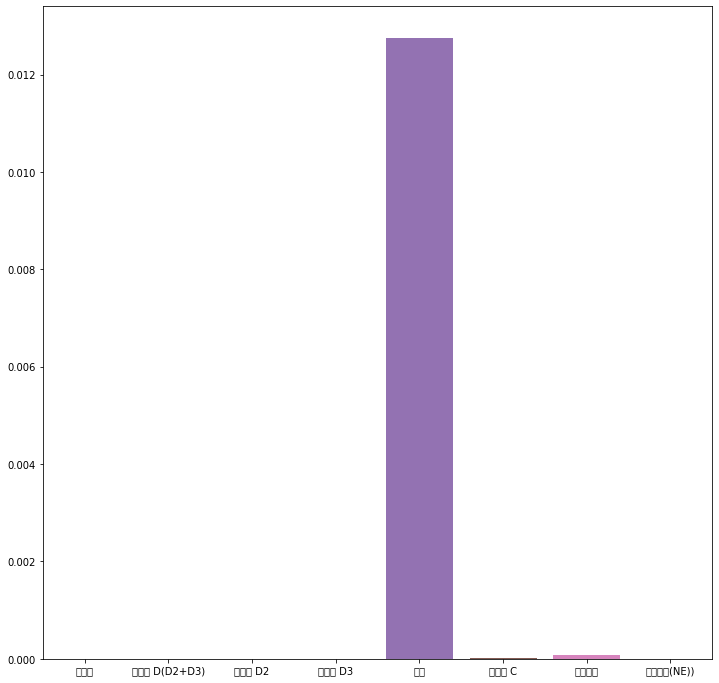

Animal fat


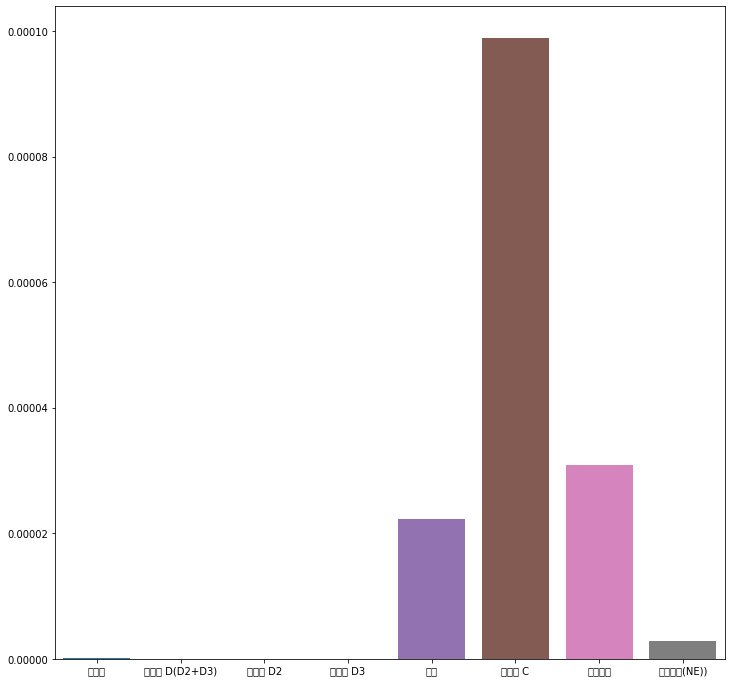

Animal product


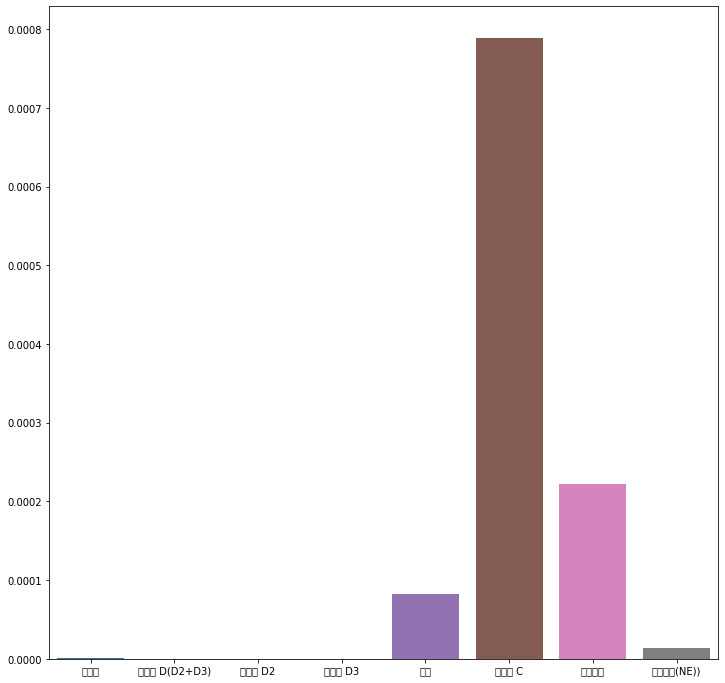

Aquatic Products


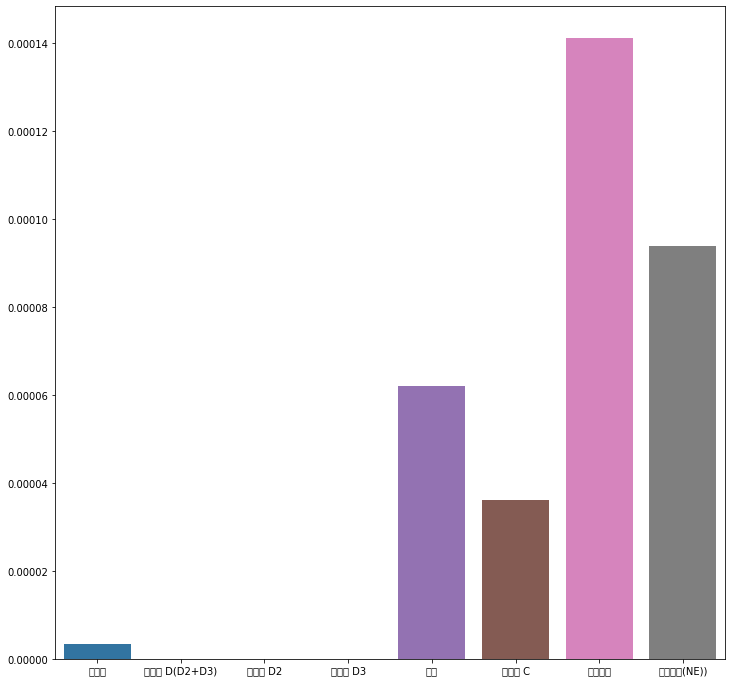

Cereals


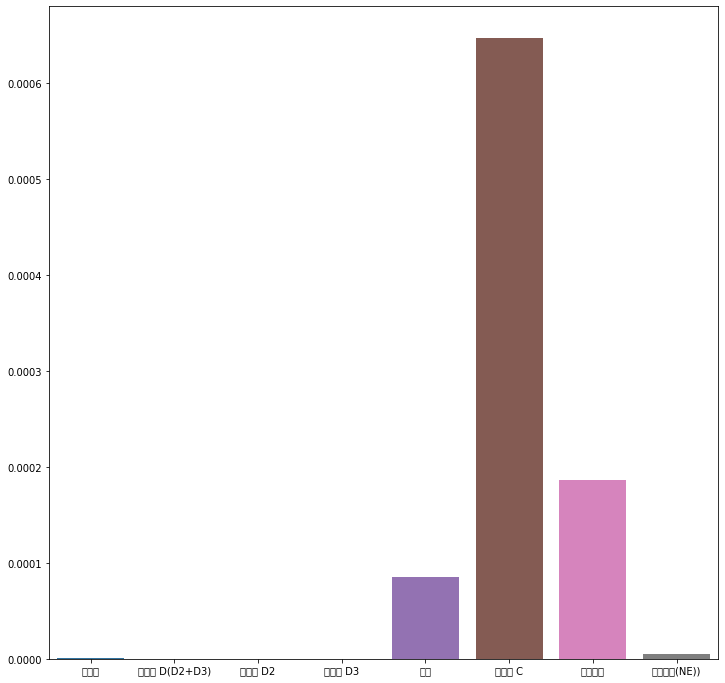

Egg


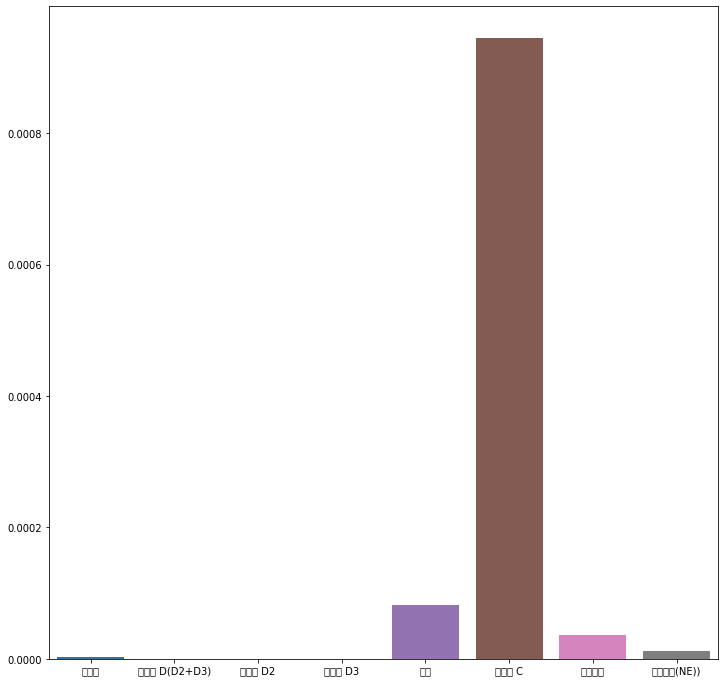

Fish, Sea food


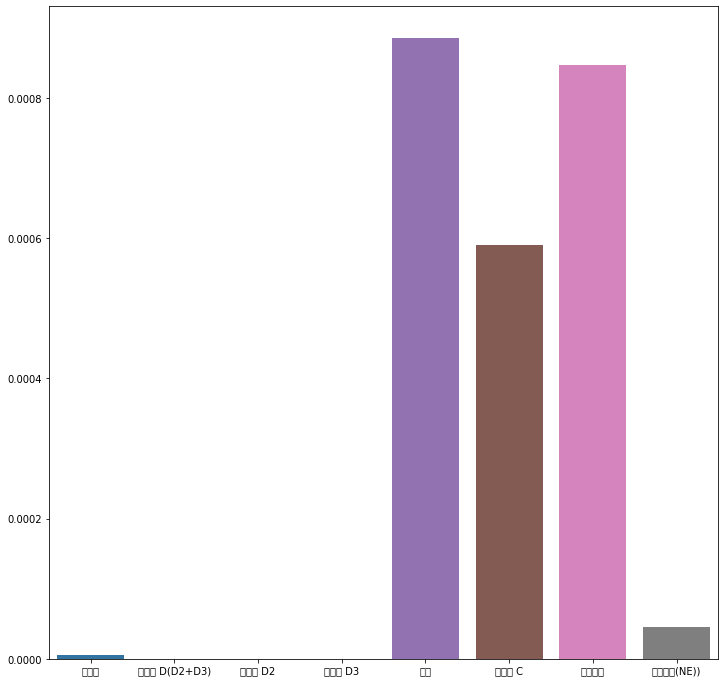

Apples


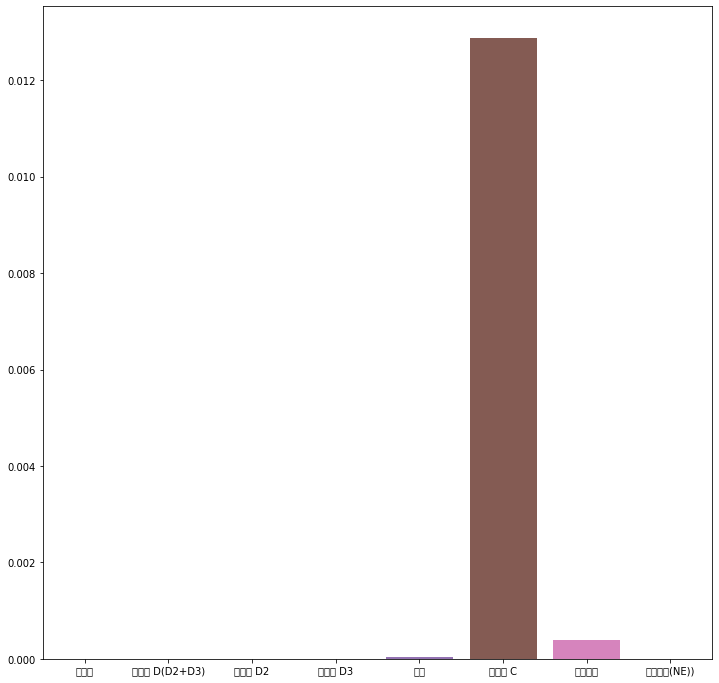

Meat


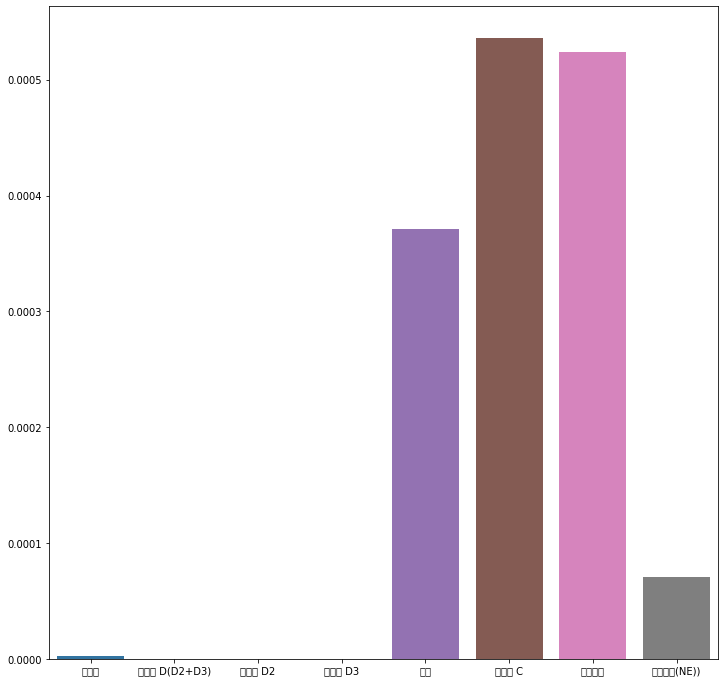

Milk


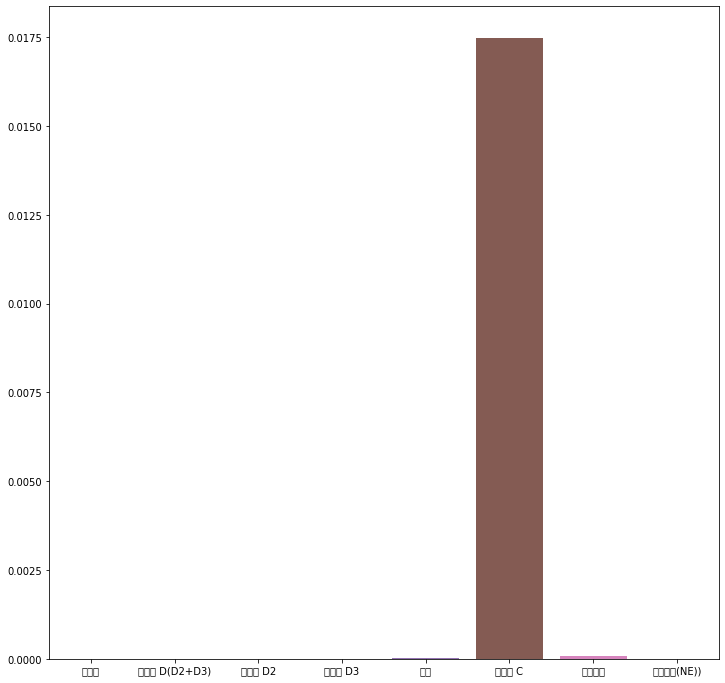

Miscellaneous


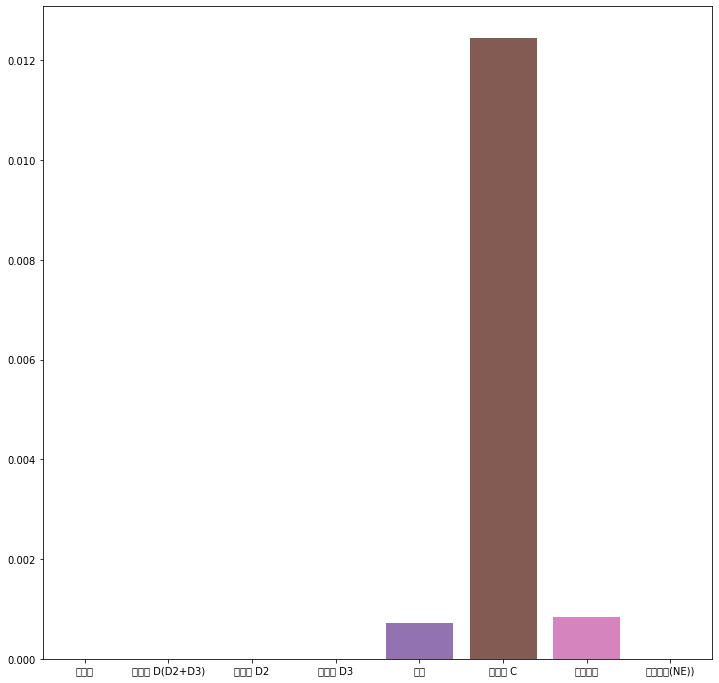

Offals


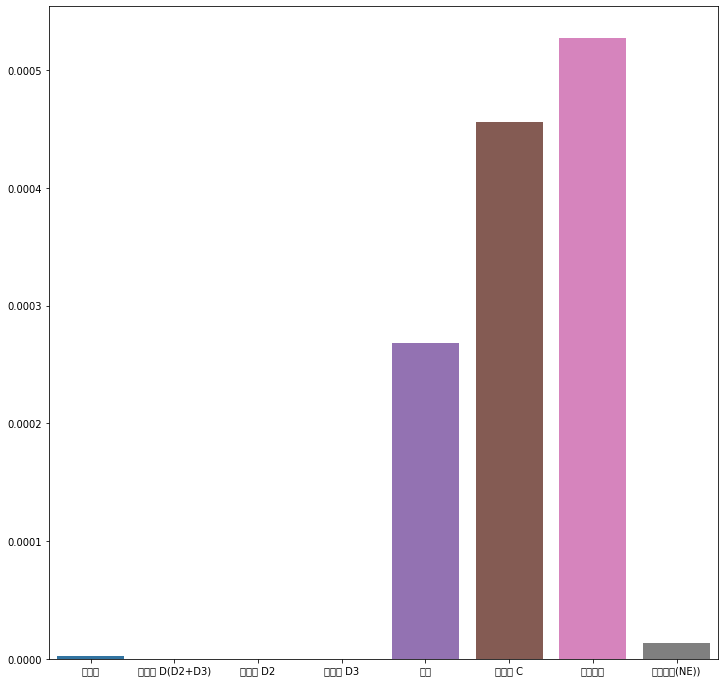

Oil Crop


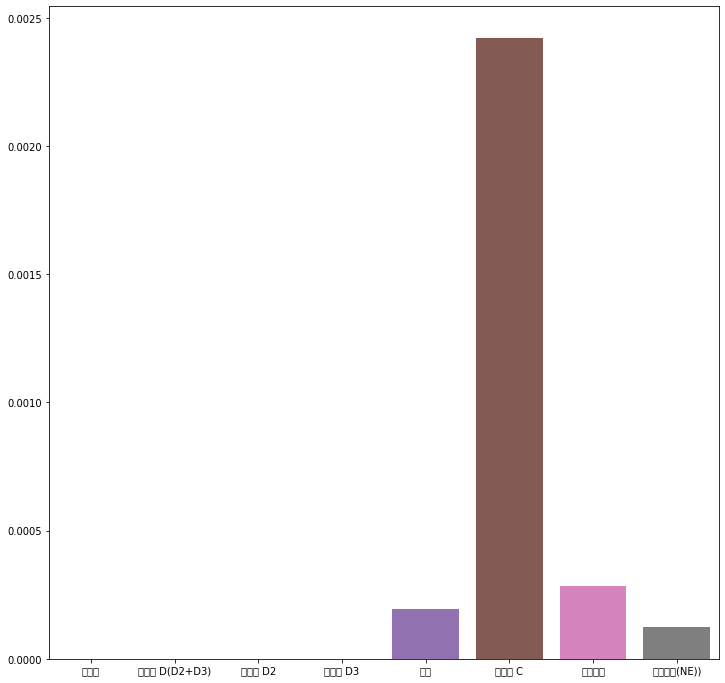

Pulse


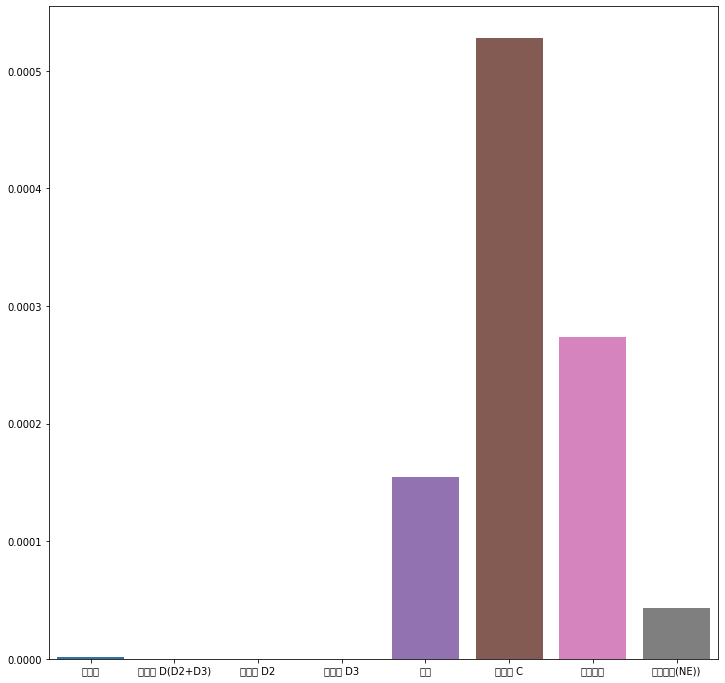

Spices


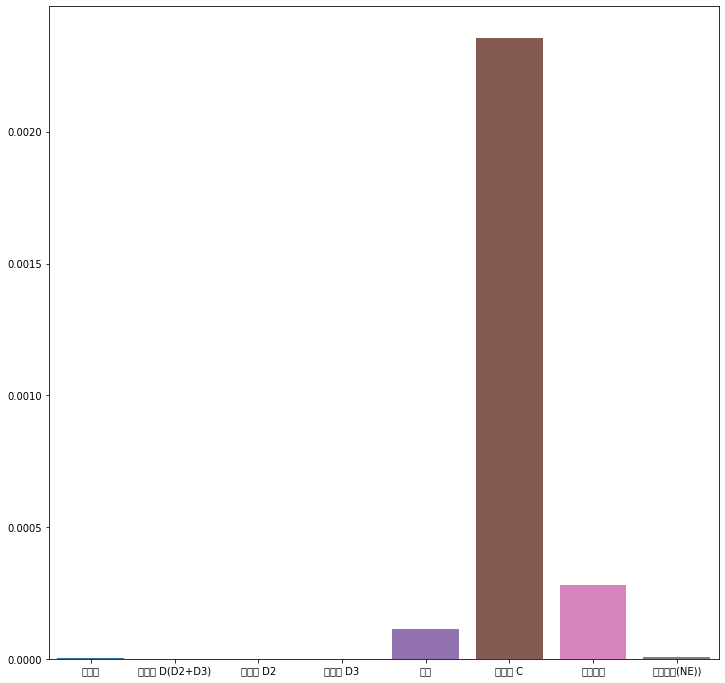

Starchy Roots


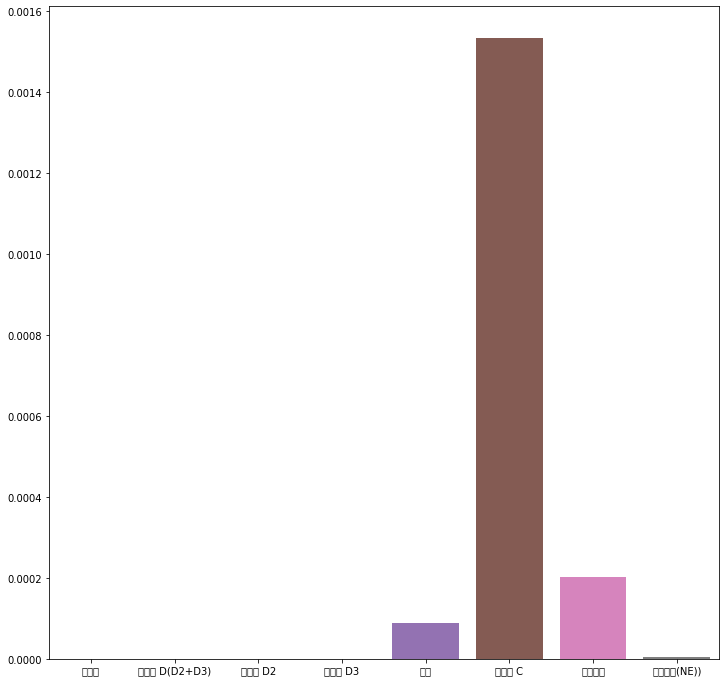

Stimulants


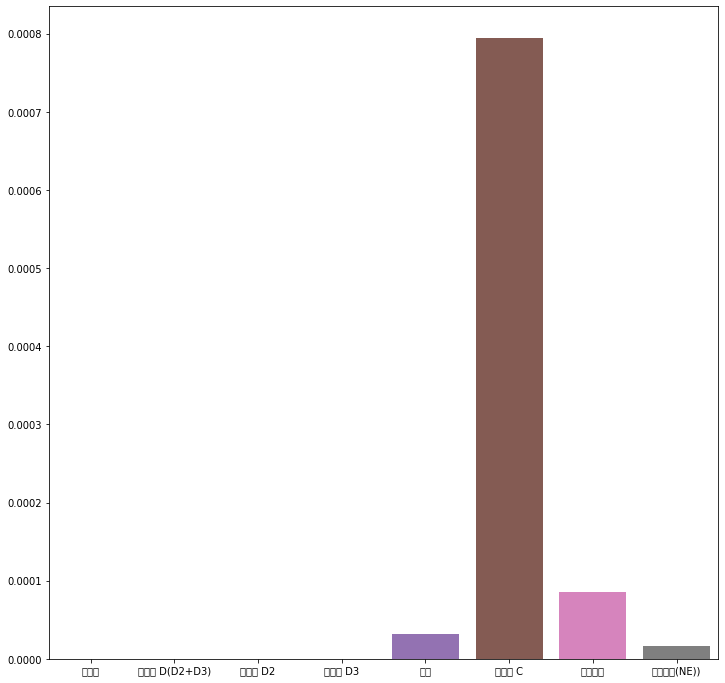

Sugar


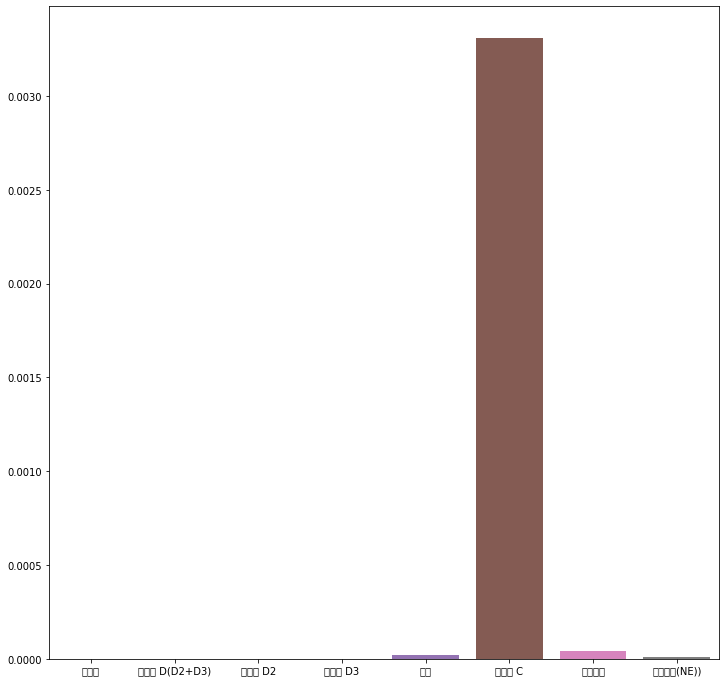

Treenuts


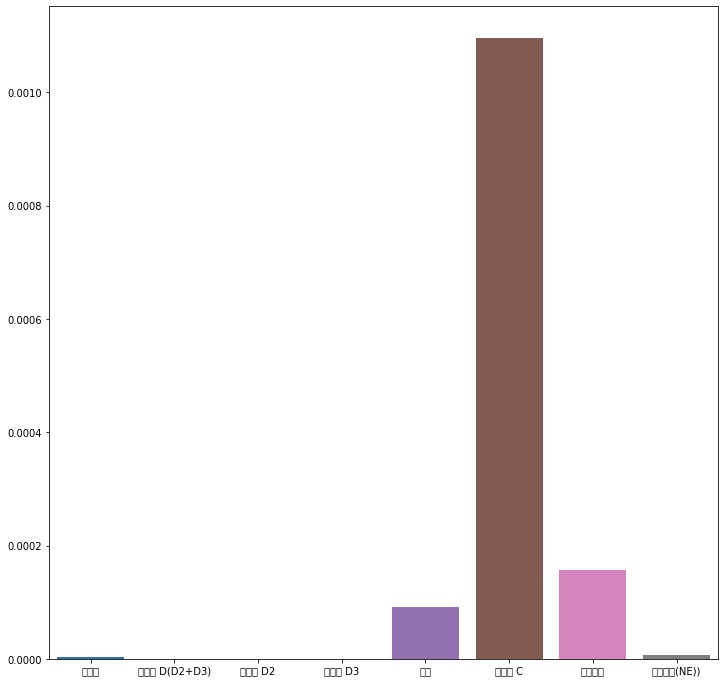

Vegetable Oil


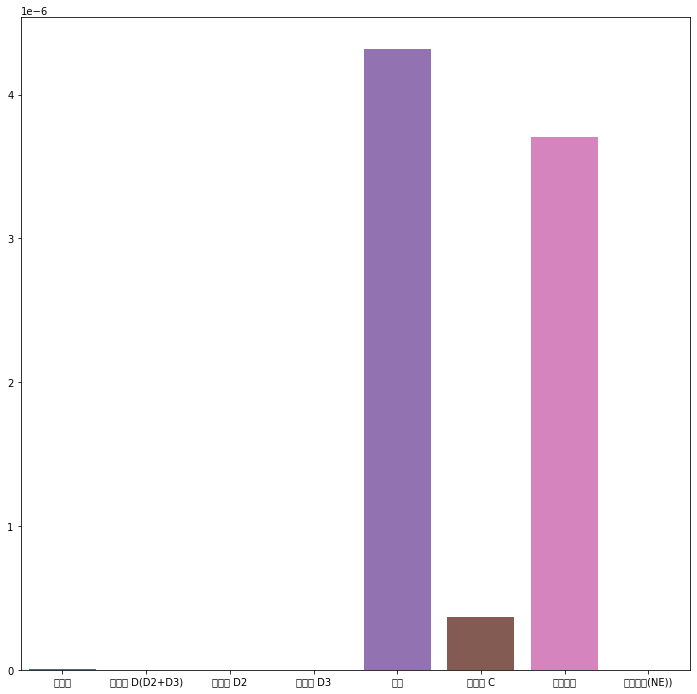

Vegetable


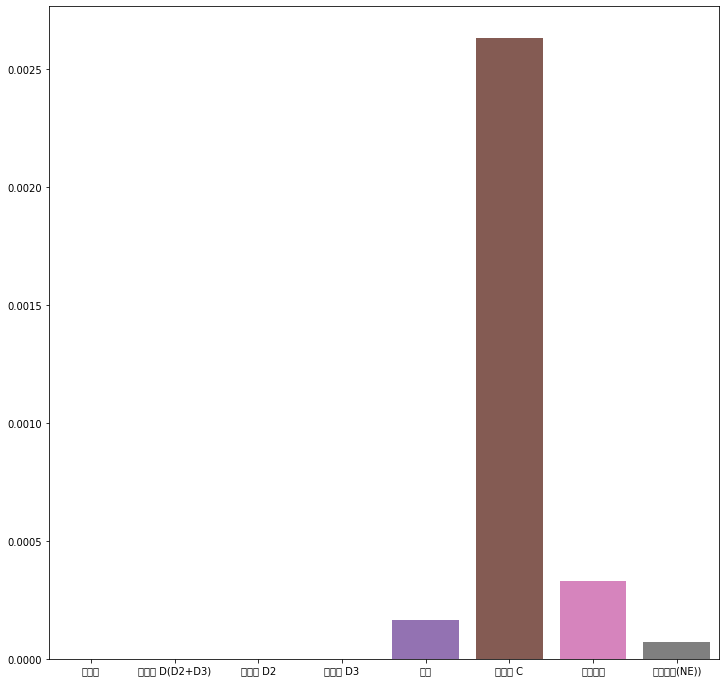

Vegetal Products


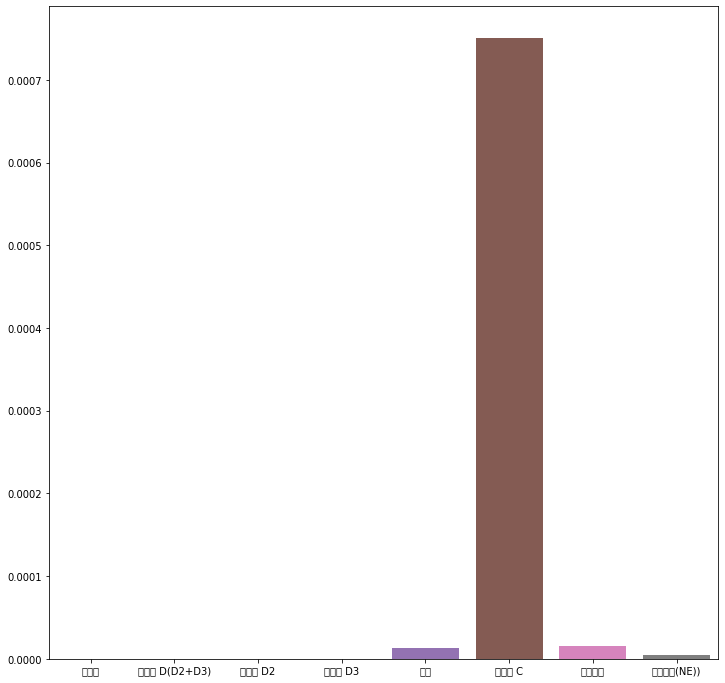

In [127]:
arr = np.array([])
for i in food_groups:
    print(i)
    plt.figure(figsize=(12,12))
    tmp = food_nutrients_copy2[food_nutrients_copy2[i] == True]
    arr = np.append(arr, tmp['아연'], axis=0)
    sns.barplot(x=['셀레늄', '비타민 D(D2+D3)', '비타민 D2', '비타민 D3','아연','비타민 C','나이아신','나이아신(NE))'], y=tmp.loc[:,['셀레늄', '비타민 D(D2+D3)', '비타민 D2', '비타민 D3','아연','비타민 C','나이아신','나이아신(NE))']].mean())
    plt.show()

In [129]:
arr.shape

(61719,)

In [75]:
food_groups = {
        'Alcoholic beverage':['맥주','소주','막걸리','보드카',],
        'Animal fat':['크림','치즈','마요네즈','크러스트','버터','식용유','콤비네이션','모짜렐라','피자',
                      '쇠기름','마유','체다'
                     ],
        'Animal product':['해장','소세지','쥐포','베이컨','치킨','윙','핫도그','만두','단백질','소시지',
                         '비엔나','햄','버거','후랑크','맥스봉','미트볼','리얼팜','후렌치후라이','데리야끼',
                          '제육','런천미트','커틀릿','타코야끼','리챔','프로틴','곰탕','설렁탕','돈까스',
                          '부대찌개','오곡','알탕','꿔바','육개장','동그랑',
                         ],
        'Aquatic Products':['어묵','맛살',
            
        ],
        'Cereals':['밥','스파게티','빵','잣','잡곡','귀리','바게트','곡물','감자','통밀','라멘','쫄면',
                  '국수','소면','파스타','냉면','떡','짬뽕','소바','라면','선식','메밀면','보리','쌀',
                  '참깨','콘푸라이트','당면','비빔면','짜장면','코코볼','또띠아','카스테라','밀가루',
                  '리소토','브래드','우동','포테이토','현미','사발면','브레드','크로와상','오트','시리얼',
                   '크로아상','흑밀','죽','곡식','호밀','소보루','인절미','누룽지','그라놀라','미숫',
                   '기장','백설기','전병','잡채','누들','사리','오므라이스','리조또','면','푸레이크',
                   '수제비','베이글',
                  ],
        'Egg':['계란', '달걀','에그','오므라이스'],
        'Fish, Sea food':['병어','장어','갈비','임연수','황태','바지락','올갱이','홍합','회','굴',
                         '해물', '골뱅이', '쥐치','농어','문어','멍게','새우','연어','참치','한치',
                         '낙지','소라','오징어','홍어','가자미','북어','동태','조기','게','고등어',
                         '도미','민어','붕어','전어','추어','대구','슈림프','쉬림프','횟','갈치',
                         '다금바리','조개','해삼','대게','부각','노래미','잉어','우럭','복어','전복',
                         '다슬기','전갱이','아구','가재','다랑어','톳','쏘가리','꽁치','돗돔','꼬막',
                          '방어','명태','미꾸라지','달팽이','능성어','돌돔','감성돔','도화돔','독돔','범돔',
                          '뿔돔','샛돔','어름돔','옥돔','육동가리돔','자리돔','참돔','호박돔','황돔','각시돔',
                          '빙어','고래','미역','고둥','삼치','가물치','꼴뚜기','정어리','거북이','크릴',
                          '숭어','우렁','주꾸미','새치','산천어','메기','다시마','줄돔','쌍둥가리',
                          '아귀','매생이','거봉','은어','상어','멸치','도다리','향어','가리비',
                          '청어','송어',
                         ],
        'Apples':['매작과','사과','오렌지','자몽','포도','귤','주스','베리','키위','자몽','과일',
                 '멜론','수박','석류','딸기','잼','쨈','복숭아','바나나','레몬','망고','살구',
                 '파인애플','단감','오디','토마토','과즙','깔리만시','두리안','유자','매실','참외',
                  '복분자','칼라만시','자두','연시','자두','애플','깔라만시','대추','아보카도',
                  '한라봉',
                 ],
        'Meat':['꿩', '닭','돼지','소고기','갈비','오리','등심','모래집','바비큐','불고기','스테이크',
               '와규','삼겹','쇠고기','돈코츠','돈육','족발','한우','차슈','송아지','메추리','소 부산물',
                '삼계','토끼','거위','바베큐','안심','양고기'
               ],
        'Milk':['우유','요구르트','요거트','밀크','yogurt','라떼','요플레','엑티비아','두유','요거'
               '유산균','연유','야쿠르트','불가리스','파스퇴르','유산균','요거'
               ], # 요거트
        'Miscellaneous':['분유'],
        'Offals':['순대','내장', '곱창',],
        'Oil Crop':['목화','코코넛','해바라기','옥수수','팝콘','들깨','수수',], # 해바라기유 빼고
        'Pulse':['된장', '콩', '팥','메주','두유','두부','녹두','청국장',],
        'Spices':['고추장','된장','소스','간장','고추','파프리카','카레','비빔장','쌈장','춘장','막장',
                  '후추','고춧',
                 ],
        'Starchy Roots':['더덕', '무','고구마','도라지','홍삼','인삼','산삼','당근','뿌리','토란','와사비','고구',
                         '장마','연근',
                        ],
        'Stimulants':['초콜릿','녹차','초코','커피','에스프레소','그린 티','콜드브루','마끼아또','메리카노',
                      '완두','카페','티백','모카','카푸치노','칸타타','마키아토','홍차','블랙티','초콜렛',
                     '마키아또','그린티','헤이즐','파르페','카모마일','쵸코','아포가토','콜라','맥심','얼그레이티',
                      '우롱티','원두','얼 그레이','허브 티','한차',
                     ],
        'Sugar':['설탕','캔디','흑당','쿠키','젤리','달고나','쇼콜라','케이크','케익','과자','까페',
                '오레오','누가바','푸딩','양갱','다이제','스낵','카카오','사탕','비스킷','티라미수',
                '캬라멜','아이스티','빙수','브라우니','카라멜','올리고당','메로나','쿠크다스','소프트콘',
                 '말랑카우','추파','콜라','마카롱','슈가','와플','약과','티라미스','젤라또','자유시간',
                 '빼빼로','옥동자','샤베트','길리안','비스켓','사이다','펩시','코코아','소다','바닐라',
                 '시럽','쁘띠','제티','스위트','쵸콜','제리','롯데샌드','에이드','쵸키','꿀','베이비슈',
                 '구미베어','가나마일드','껌','에이드','츄파','구미베어','크런치','석기시대','수정과',
                 '맛동산','한과','구구콘','칙촉','죠스바','가나','식혜'
                ], # 무설탕 빼고
        'Treenuts':['호두','넛트','너트','아몬드','월넛','웨하스','견과','도토리','피스타치오넛',],
        'Vegetable Oil':['올리브유','올리브오일','올리브 오일','해바라기유','카놀라','오일','알리오','들기름',
                        '참기름','참맛기름','유채유','올리오','마아가린',
                        ],
        'Vegetable':['시래기', '쑥', '김치', '나물', '송이','약초','깻잎','버섯','야채','피클','호박',
                    '마늘','양파','채소','고춧잎','배추','두릅','샐러드','가지','달래','브로컬리','오이',
                    '죽순','녹즙','솔잎','시금치','삼채','브로콜리','셀러리','상추','선인장','부추',
                    '고사리','씀바귀','잎','알로에','명이','비트',
                    ],
        'Vegetal Products':['와인','포도주','칵테일','식초'], # 포도주스 빼고
}